In [3]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
# it's a library that we work with plotly
import plotly.offline as py
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

In [4]:
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'german_credit_data.csv'

In [ ]:
df_credit.head(20)

In [ ]:
df_credit['Octroi'] = y

In [ ]:
df_credit.to_csv('german_credit_data_complet.csv', index=False)

In [ ]:
df_credit.head()

In [6]:
pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [8]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [9]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
pd.options.mode.copy_on_write = True
# Fetch dataset
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# Data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Decode categorical attributes based on provided information
decode_map = {
    'Attribute1': {'A11': '< 0 DM', 'A12': '0 <= ... < 200 DM', 'A13': '>= 200 DM / salary assignments for at least 1 year', 'A14': 'no checking account'},
    'Attribute3': {'A30': 'no credits taken/ all credits paid back duly', 'A31': 'all credits at this bank paid back duly', 'A32': 'existing credits paid back duly till now', 'A33': 'delay in paying off in the past', 'A34': 'critical account/ other credits existing (not at this bank)'},
    'Attribute4': {'A40': 'car (new)', 'A41': 'car (used)', 'A42': 'furniture/equipment', 'A43': 'radio/television', 'A44': 'domestic appliances', 'A45': 'repairs', 'A46': 'education', 'A47': '(vacation - does not exist?)', 'A48': 'retraining', 'A49': 'business', 'A410': 'others'},
    'Attribute6': {'A61': '< 100 DM', 'A62': '100 <= ... < 500 DM', 'A63': '500 <= ... < 1000 DM', 'A64': '>= 1000 DM', 'A65': 'unknown/ no savings account'},
    'Attribute7': {'A71': 'unemployed', 'A72': '< 1 year', 'A73': '1 <= ... < 4 years', 'A74': '4 <= ... < 7 years', 'A75': '>= 7 years'},
    'Attribute9': {'A91': 'male : divorced/separated', 'A92': 'female : divorced/separated/married', 'A93': 'male : single', 'A94': 'male : married/widowed', 'A95': 'female : single'},
    'Attribute10': {'A101': 'none', 'A102': 'co-applicant', 'A103': 'guarantor'},
    'Attribute12': {'A121': 'real estate', 'A122': 'if not A121 : building society savings agreement/ life insurance', 'A123': 'if not A121/A122 : car or other, not in attribute 6', 'A124': 'unknown / no property'},
    'Attribute14': {'A141': 'bank', 'A142': 'stores', 'A143': 'none'},
    'Attribute15': {'A151': 'rent', 'A152': 'own', 'A153': 'for free'},
    'Attribute17': {'A171': 'unemployed/ unskilled - non-resident', 'A172': 'unskilled - resident', 'A173': 'skilled employee / official', 'A174': 'management/ self-employed/ highly qualified employee/ officer'},
    'Attribute19': {'A191': 'none', 'A192': 'yes, registered under the customers name'},
    'Attribute20': {'A201': 'yes', 'A202': 'no'}
}

for col, mapping in decode_map.items():
    X[col] = X[col].map(mapping)

# Rename columns with their descriptions
X.columns = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
             'Present employment since', 'Installment rate in percentage of disposable income', 'Personal status and sex',
             'Other debtors / guarantors', 'Present residence since', 'Property', 'Age in years', 'Other installment plans',
             'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for',
             'Telephone', 'Foreign worker']

# Separate 'Personal status and sex' into two columns
X[['Sex', 'Personal status']] = X['Personal status and sex'].str.split(' : ', expand=True)
X.drop('Personal status and sex', axis=1, inplace=True)

# Combine features and target into one dataframe
df = X.copy()
df['Target'] = y

# Save dataframe to CSV
df.to_csv('statlog_german_credit_data_decoded.csv', index=False)

print("Dataset saved as 'statlog_german_credit_data_decoded.csv'")


Dataset saved as 'statlog_german_credit_data_decoded.csv'


In [10]:
dataset = pd.read_csv("statlog_german_credit_data_decoded.csv")
dataset.head(5)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Other debtors / guarantors,Present residence since,...,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Sex,Personal status,Target
0,< 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,>= 7 years,4,none,4,...,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,male,single,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,none,2,...,none,own,1,skilled employee / official,1,none,yes,female,divorced/separated/married,2
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,4 <= ... < 7 years,2,none,3,...,none,own,1,unskilled - resident,2,none,yes,male,single,1
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,guarantor,4,...,none,for free,1,skilled employee / official,2,none,yes,male,single,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,none,4,...,none,for free,2,skilled employee / official,2,none,yes,male,single,2


In [11]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
pd.options.mode.copy_on_write = True
# Fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# Data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Decode categorical attributes based on provided information
decode_map = {
    'Attribute1': {'A11': '< 0 DM', 'A12': '0 <= ... < 200 DM', 'A13': '>= 200 DM / affectations salariales d\'au moins 1 an', 'A14': 'pas de compte chèque'},
    'Attribute3': {'A30': 'pas de crédits / tous les crédits remboursés dûment', 'A31': 'tous les crédits dans cette banque remboursés dûment', 'A32': 'crédits existants remboursés dûment jusqu\'à présent', 'A33': 'retard de remboursement dans le passé', 'A34': 'compte critique / autres crédits existants (pas dans cette banque)'},
    'Attribute4': {'A40': 'voiture (neuve)', 'A41': 'voiture (d\'occasion)', 'A42': 'meubles/équipement', 'A43': 'radio/télévision', 'A44': 'appareils domestiques', 'A45': 'réparations', 'A46': 'éducation', 'A47': '(vacances - n\'existe pas?)', 'A48': 'reconversion', 'A49': 'affaires', 'A410': 'autres'},
    'Attribute6': {'A61': '< 100 DM', 'A62': '100 <= ... < 500 DM', 'A63': '500 <= ... < 1000 DM', 'A64': '>= 1000 DM', 'A65': 'inconnu / pas de compte d\'épargne'},
    'Attribute7': {'A71': 'sans emploi', 'A72': '< 1 an', 'A73': '1 <= ... < 4 ans', 'A74': '4 <= ... < 7 ans', 'A75': '>= 7 ans'},
    'Attribute9': {'A91': 'homme : divorcé/séparé', 'A92': 'femme : divorcée/séparée/mariée', 'A93': 'homme : célibataire', 'A94': 'homme : marié/veuf', 'A95': 'femme : célibataire'},
    'Attribute10': {'A101': 'aucun', 'A102': 'co-demandeur', 'A103': 'garant'},
    'Attribute12': {'A121': 'biens immobiliers', 'A122': 'si pas A121 : accord d\'épargne-logement / assurance-vie', 'A123': 'si pas A121/A122 : voiture ou autre, pas dans la catégorie 6', 'A124': 'inconnu / pas de propriété'},
    'Attribute14': {'A141': 'banque', 'A142': 'magasins', 'A143': 'aucun'},
    'Attribute15': {'A151': 'location', 'A152': 'propriétaire', 'A153': 'gratuit'},
    'Attribute17': {'A171': 'sans emploi / non qualifié - non résident', 'A172': 'non qualifié - résident', 'A173': 'employé qualifié / fonctionnaire', 'A174': 'direction / indépendant / employé hautement qualifié / cadre'},
    'Attribute19': {'A191': 'aucun', 'A192': 'oui, enregistré sous le nom du client'},
    'Attribute20': {'A201': 'oui', 'A202': 'non'}
}

translate_columns = {
    'Status of existing checking account': 'Statut du compte chèque existant',
    'Duration in month': 'Durée en mois',
    'Credit history': 'Historique de crédit',
    'Purpose': 'Objet',
    'Credit amount': 'Montant du crédit',
    'Savings account/bonds': 'Compte d\'épargne / Obligations',
    'Present employment since': 'Emploi actuel depuis',
    'Installment rate in percentage of disposable income': 'Taux de versement en pourcentage du revenu disponible',
    'Personal status and sex': 'Statut personnel et sexe',
    'Other debtors / guarantors': 'Autres débiteurs / garants',
    'Present residence since': 'Résidence actuelle depuis',
    'Property': 'Propriété',
    'Age in years': 'Âge en années',
    'Other installment plans': 'Autres plans de versements',
    'Housing': 'Logement',
    'Number of existing credits at this bank': 'Nombre de crédits existants dans cette banque',
    'Job': 'Emploi',
    'Number of people being liable to provide maintenance for': 'Nombre de personnes à charge',
    'Telephone': 'Téléphone',
    'Foreign worker': 'Travailleur étranger'
}



# Apply decode_map and translate values
for col, mapping in decode_map.items():
    X[col] = X[col].map(mapping)

# Rename columns with their descriptions
X.columns = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
             'Present employment since', 'Installment rate in percentage of disposable income', 'Personal status and sex',
             'Other debtors / guarantors', 'Present residence since', 'Property', 'Age in years', 'Other installment plans',
             'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for',
             'Telephone', 'Foreign worker']


# Rename columns with their descriptions in French
X.columns = [translate_columns[col] for col in X.columns]

# Separate 'Statut personnel et sexe' into two columns
X[['Sexe', 'Statut personnel']] = X['Statut personnel et sexe'].str.split(' : ', expand=True)
X.drop('Statut personnel et sexe', axis=1, inplace=True)

# Combine features and target into one dataframe
df = X.copy()
df['Octroi'] = y

# Save dataframe to CSV
df.to_csv('statlog_german_credit_data_francais.csv', index=False)

print("Dataset saved as 'statlog_german_credit_data_francais.csv'")


Dataset saved as 'statlog_german_credit_data_francais.csv'


In [12]:
dataset = pd.read_csv("statlog_german_credit_data_francais.csv")
dataset.head(5)

,Statut du compte chèque existant,Durée en mois,Historique de crédit,Objet,Montant du crédit,Compte d'épargne / Obligations,Emploi actuel depuis,Taux de versement en pourcentage du revenu disponible,Autres débiteurs / garants,Résidence actuelle depuis,...,Autres plans de versements,Logement,Nombre de crédits existants dans cette banque,Emploi,Nombre de personnes à charge,Téléphone,Travailleur étranger,Sexe,Statut personnel,Octroi
0,< 0 DM,6,compte critique / autres crédits existants (pa...,radio/télévision,1169,inconnu / pas de compte d'épargne,>= 7 ans,4,aucun,4,...,aucun,propriétaire,2,employé qualifié / fonctionnaire,1,"oui, enregistré sous le nom du client",oui,homme,célibataire,1
1,0 <= ... < 200 DM,48,crédits existants remboursés dûment jusqu'à pr...,radio/télévision,5951,< 100 DM,1 <= ... < 4 ans,2,aucun,2,...,aucun,propriétaire,1,employé qualifié / fonctionnaire,1,aucun,oui,femme,divorcée/séparée/mariée,2
2,pas de compte chèque,12,compte critique / autres crédits existants (pa...,éducation,2096,< 100 DM,4 <= ... < 7 ans,2,aucun,3,...,aucun,propriétaire,1,non qualifié - résident,2,aucun,oui,homme,célibataire,1
3,< 0 DM,42,crédits existants remboursés dûment jusqu'à pr...,meubles/équipement,7882,< 100 DM,4 <= ... < 7 ans,2,garant,4,...,aucun,gratuit,1,employé qualifié / fonctionnaire,2,aucun,oui,homme,célibataire,1
4,< 0 DM,24,retard de remboursement dans le passé,voiture (neuve),4870,< 100 DM,1 <= ... < 4 ans,3,aucun,4,...,aucun,gratuit,2,employé qualifié / fonctionnaire,2,aucun,oui,homme,célibataire,2


In [28]:
# Informations sur le dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Statut du compte chèque existant                       1000 non-null   object
 1   Durée en mois                                          1000 non-null   int64 
 2   Historique de crédit                                   1000 non-null   object
 3   Objet                                                  1000 non-null   object
 4   Montant du crédit                                      1000 non-null   int64 
 5   Compte d'épargne / Obligations                         1000 non-null   object
 6   Emploi actuel depuis                                   1000 non-null   object
 7   Taux de versement en pourcentage du revenu disponible  1000 non-null   int64 
 8   Autres débiteurs / garants                             1000

In [14]:
# Vérification des valeurs manquantes
dataset.isna().sum(axis=0)

,0
Statut du compte chèque existant,0
Durée en mois,0
Historique de crédit,0
Objet,0
Montant du crédit,0
Compte d'épargne / Obligations,0
Emploi actuel depuis,0
Taux de versement en pourcentage du revenu disponible,0
Autres débiteurs / garants,0
Résidence actuelle depuis,0


In [29]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
dataset.describe(include='all')


Statistiques descriptives :


,Statut du compte chèque existant,Durée en mois,Historique de crédit,Objet,Montant du crédit,Compte d'épargne / Obligations,Emploi actuel depuis,Taux de versement en pourcentage du revenu disponible,Autres débiteurs / garants,Résidence actuelle depuis,...,Autres plans de versements,Logement,Nombre de crédits existants dans cette banque,Emploi,Nombre de personnes à charge,Téléphone,Travailleur étranger,Sexe,Statut personnel,Octroi
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,...,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,3,NaN,...,3,3,NaN,4,NaN,2,2,2,4,NaN
top,pas de compte chèque,NaN,crédits existants remboursés dûment jusqu'à pr...,radio/télévision,NaN,< 100 DM,1 <= ... < 4 ans,NaN,aucun,NaN,...,aucun,propriétaire,NaN,employé qualifié / fonctionnaire,NaN,aucun,oui,homme,célibataire,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,907,NaN,...,814,713,NaN,630,NaN,596,963,690,548,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,2.845000,...,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,1.103718,...,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,1.000000,...,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,2.000000,...,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,3.000000,...,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,4.000000,...,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000


In [15]:
dataset.shape

(1000, 22)

In [19]:
data = dataset.drop(['Octroi'], axis=1)

In [20]:
# Identification des colonnes catégorielles et numériques
categorical_features = data.select_dtypes(include=['object', 'category']).columns
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
print(categorical_features)
print(numeric_features)

Index(['Statut du compte chèque existant', 'Historique de crédit', 'Objet',
       'Compte d'épargne / Obligations', 'Emploi actuel depuis',
       'Autres débiteurs / garants', 'Propriété', 'Autres plans de versements',
       'Logement', 'Emploi', 'Téléphone', 'Travailleur étranger', 'Sexe',
       'Statut personnel'],
      dtype='object')
Index(['Durée en mois', 'Montant du crédit',
       'Taux de versement en pourcentage du revenu disponible',
       'Résidence actuelle depuis', 'Âge en années',
       'Nombre de crédits existants dans cette banque',
       'Nombre de personnes à charge'],
      dtype='object')


In [21]:
data[numeric_features].head()

,Durée en mois,Montant du crédit,Taux de versement en pourcentage du revenu disponible,Résidence actuelle depuis,Âge en années,Nombre de crédits existants dans cette banque,Nombre de personnes à charge
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


In [22]:
data[numeric_features].describe()

,Durée en mois,Montant du crédit,Taux de versement en pourcentage du revenu disponible,Résidence actuelle depuis,Âge en années,Nombre de crédits existants dans cette banque,Nombre de personnes à charge
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [23]:
data[categorical_features].head()

,Statut du compte chèque existant,Historique de crédit,Objet,Compte d'épargne / Obligations,Emploi actuel depuis,Autres débiteurs / garants,Propriété,Autres plans de versements,Logement,Emploi,Téléphone,Travailleur étranger,Sexe,Statut personnel
0,< 0 DM,compte critique / autres crédits existants (pa...,radio/télévision,inconnu / pas de compte d'épargne,>= 7 ans,aucun,biens immobiliers,aucun,propriétaire,employé qualifié / fonctionnaire,"oui, enregistré sous le nom du client",oui,homme,célibataire
1,0 <= ... < 200 DM,crédits existants remboursés dûment jusqu'à pr...,radio/télévision,< 100 DM,1 <= ... < 4 ans,aucun,biens immobiliers,aucun,propriétaire,employé qualifié / fonctionnaire,aucun,oui,femme,divorcée/séparée/mariée
2,pas de compte chèque,compte critique / autres crédits existants (pa...,éducation,< 100 DM,4 <= ... < 7 ans,aucun,biens immobiliers,aucun,propriétaire,non qualifié - résident,aucun,oui,homme,célibataire
3,< 0 DM,crédits existants remboursés dûment jusqu'à pr...,meubles/équipement,< 100 DM,4 <= ... < 7 ans,garant,si pas A121 : accord d'épargne-logement / assu...,aucun,gratuit,employé qualifié / fonctionnaire,aucun,oui,homme,célibataire
4,< 0 DM,retard de remboursement dans le passé,voiture (neuve),< 100 DM,1 <= ... < 4 ans,aucun,inconnu / pas de propriété,aucun,gratuit,employé qualifié / fonctionnaire,aucun,oui,homme,célibataire


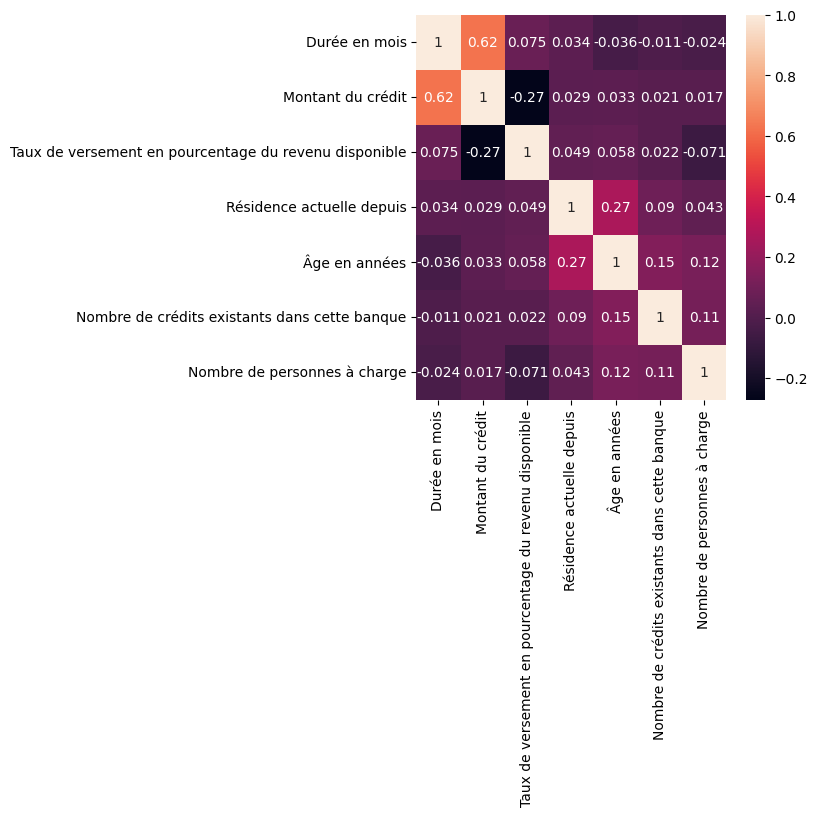

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(dataset[numeric_features].corr(), annot=True)
plt.show()

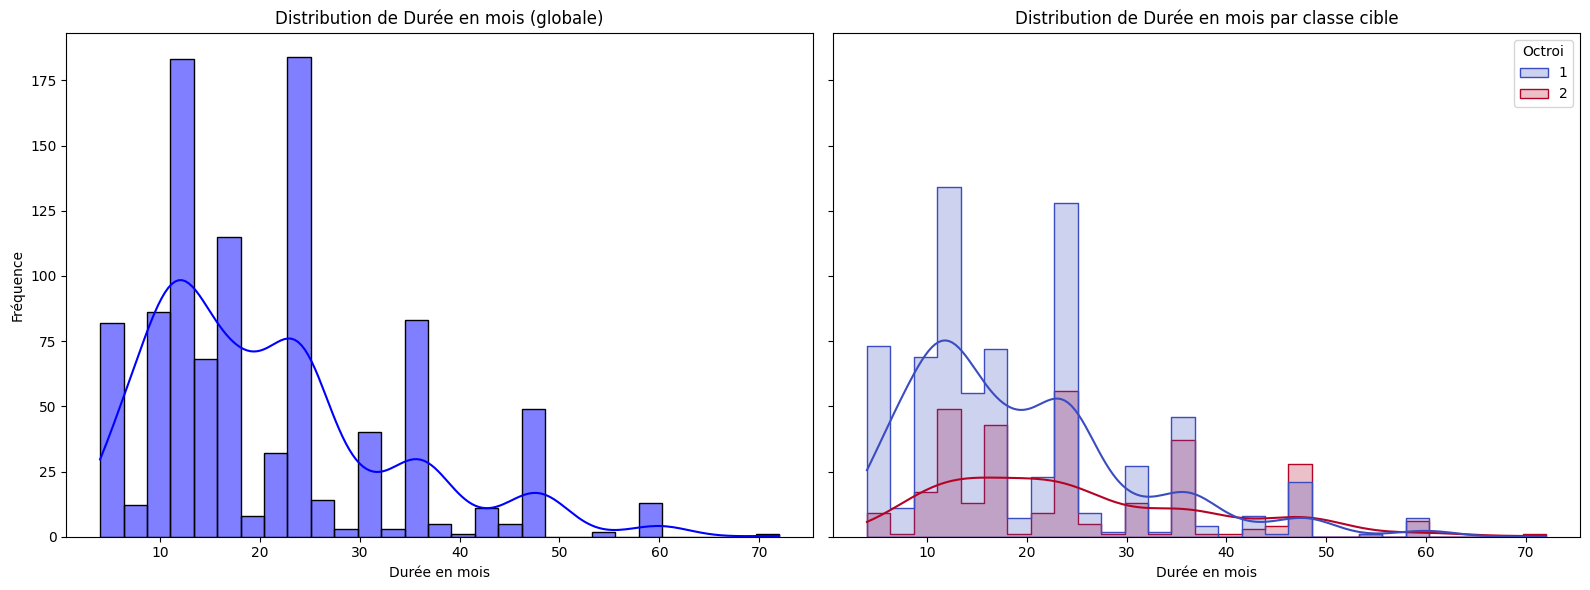

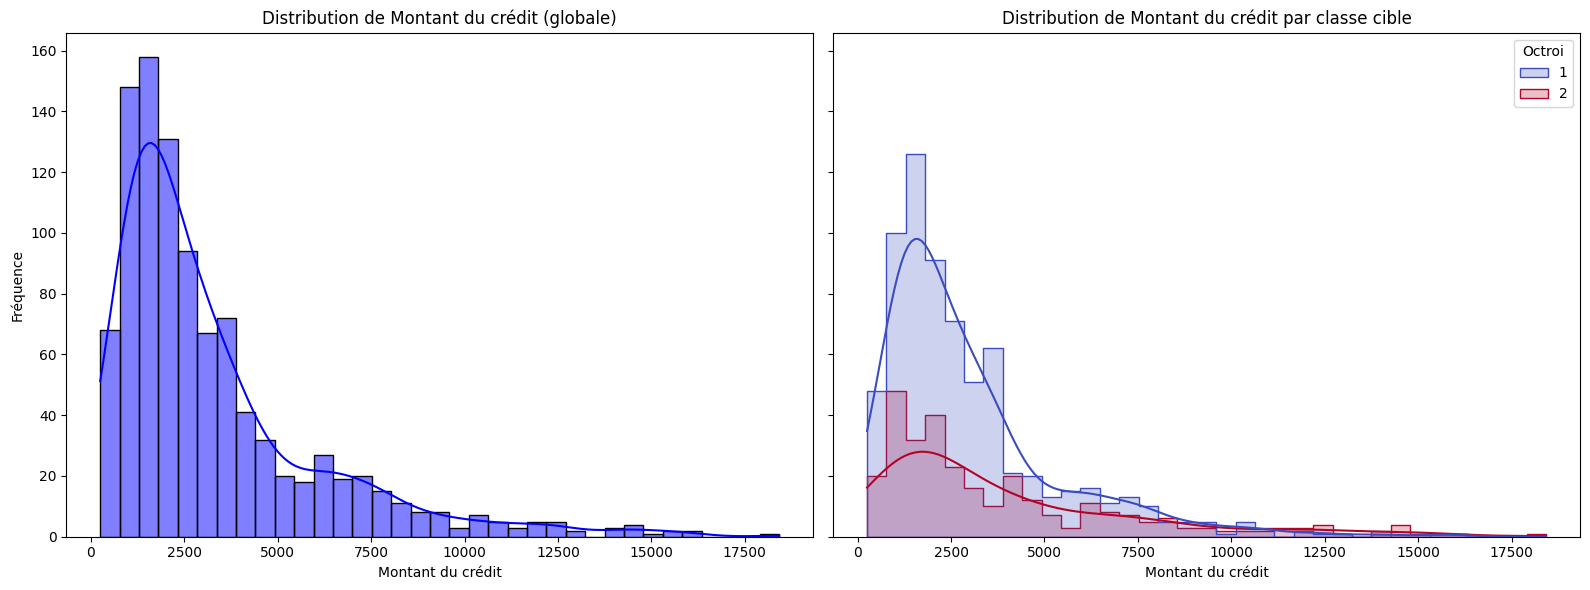

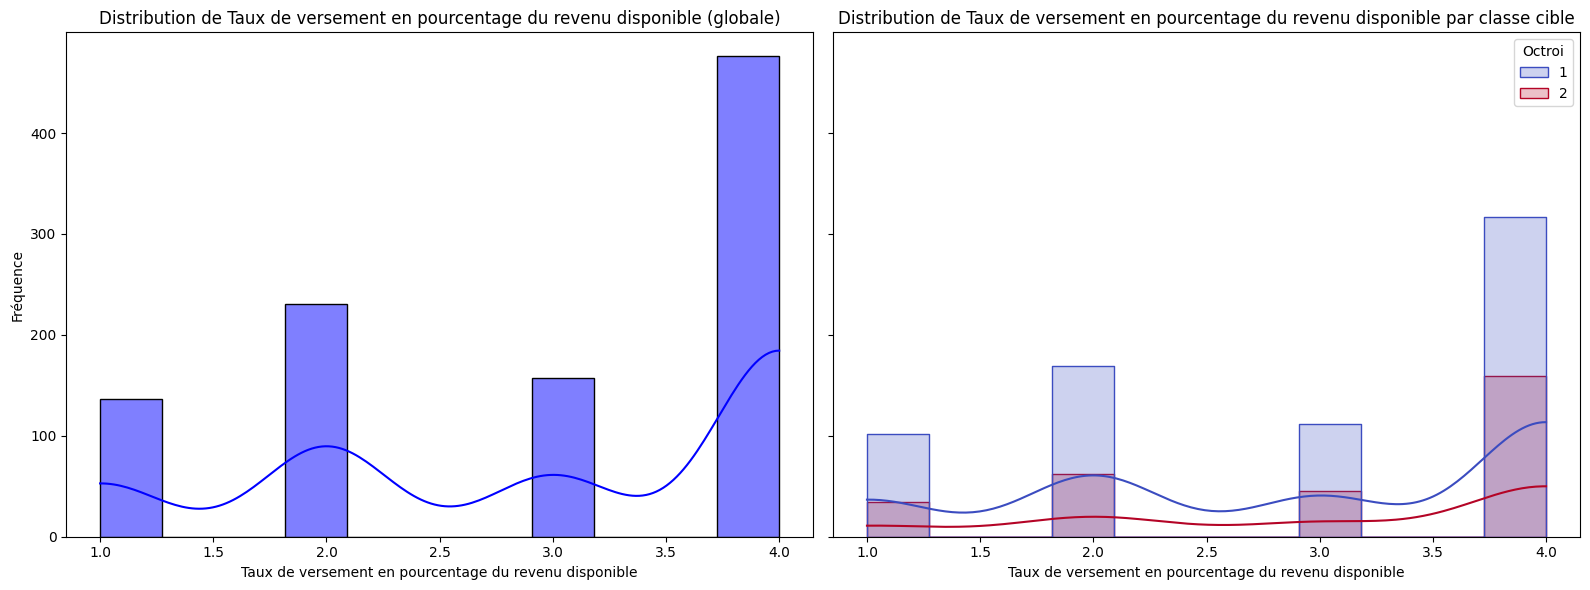

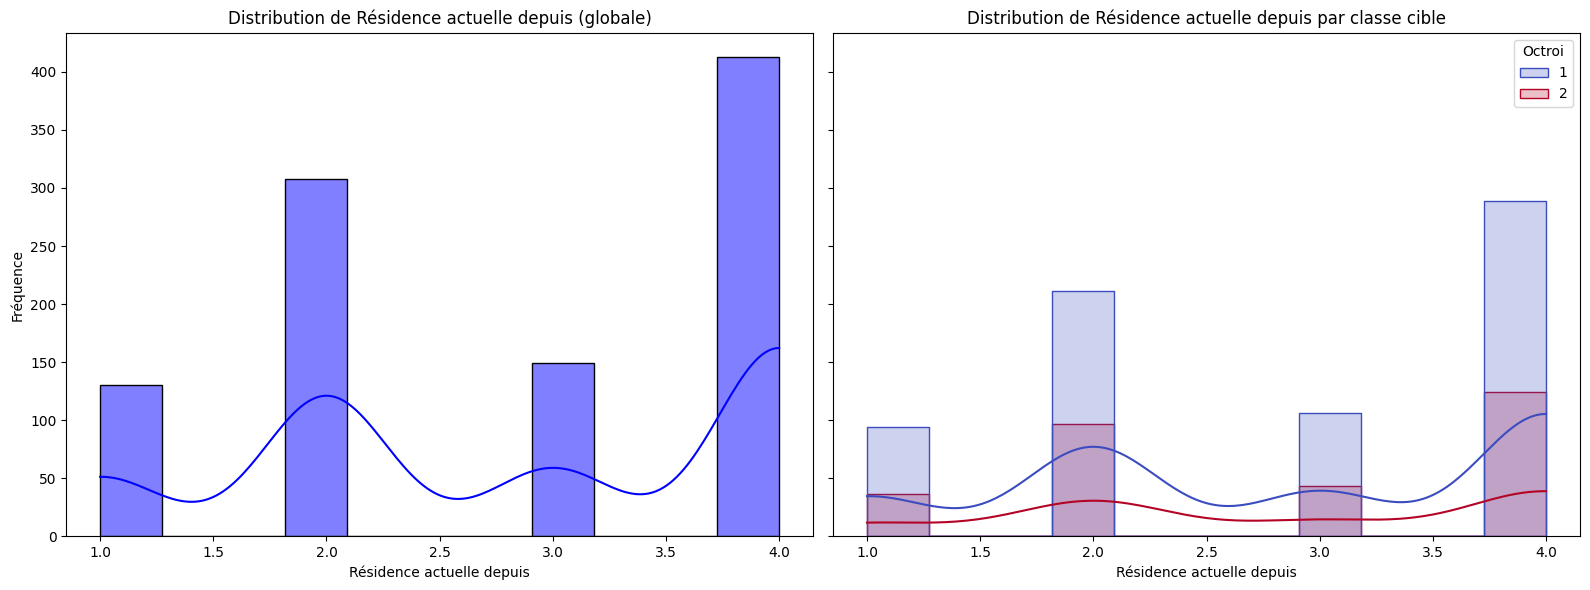

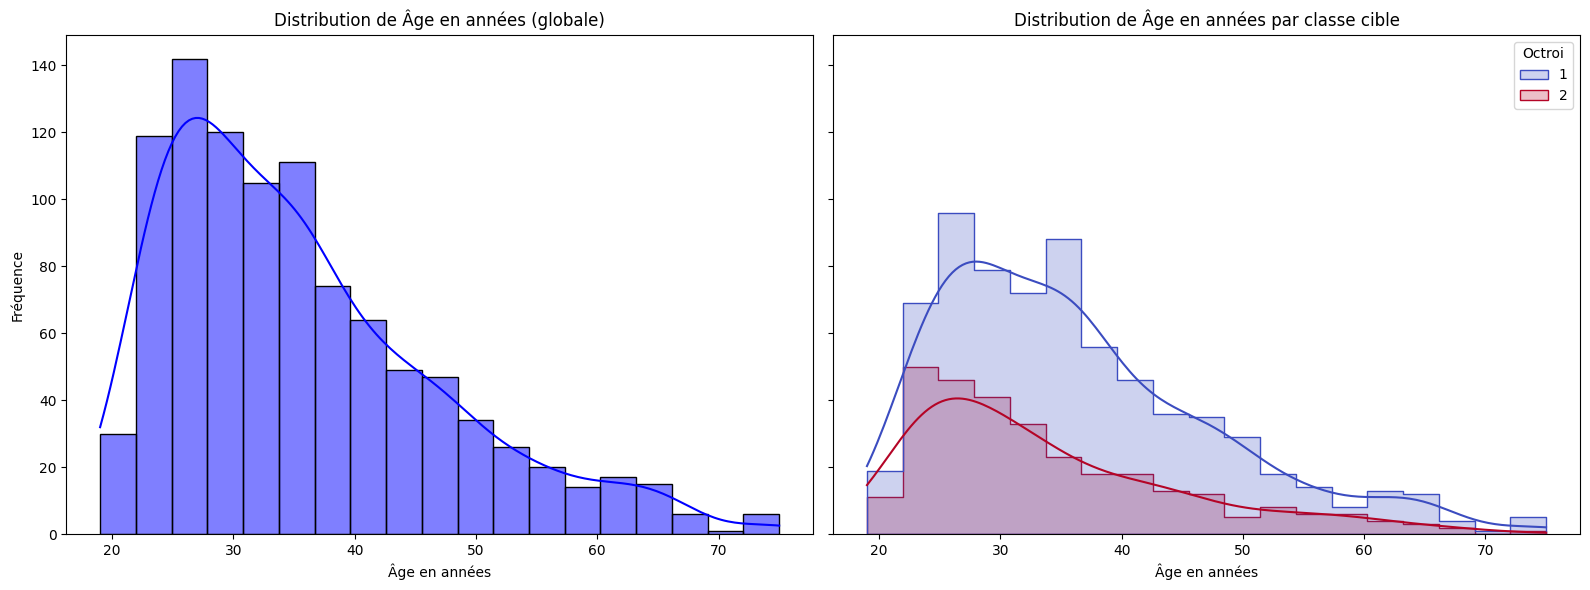

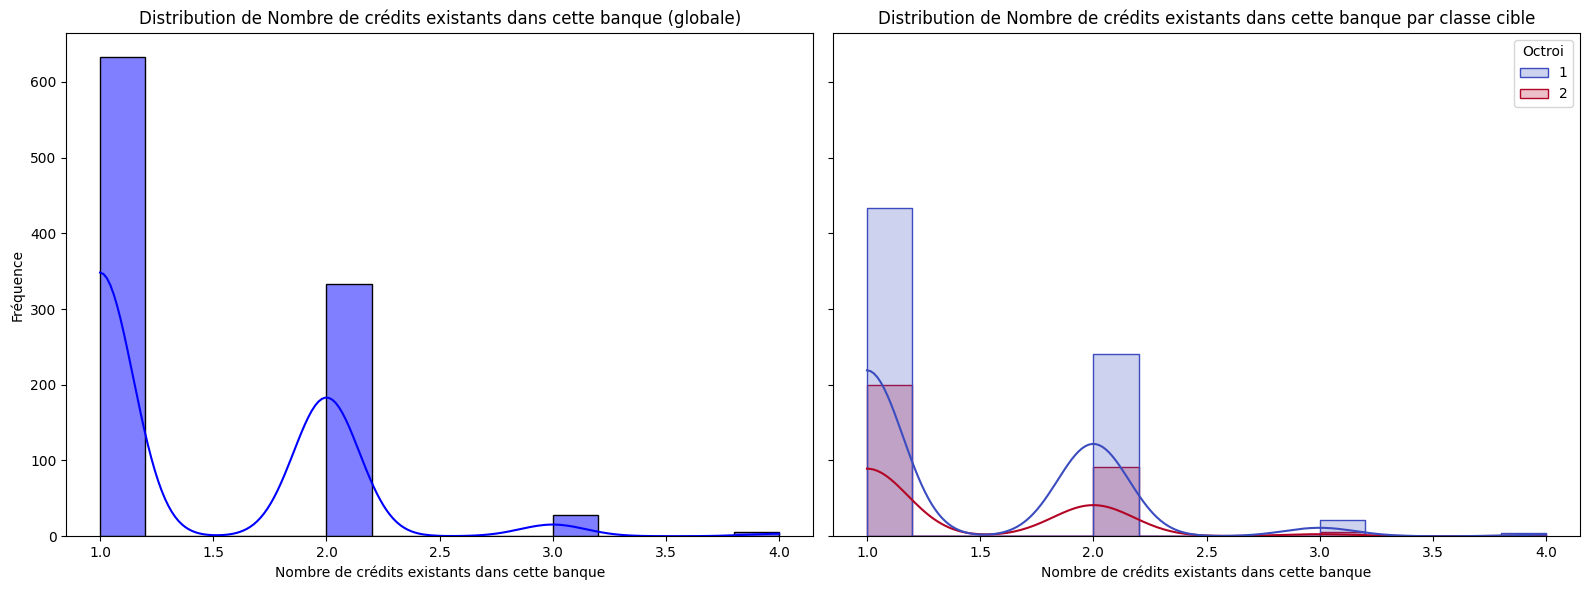

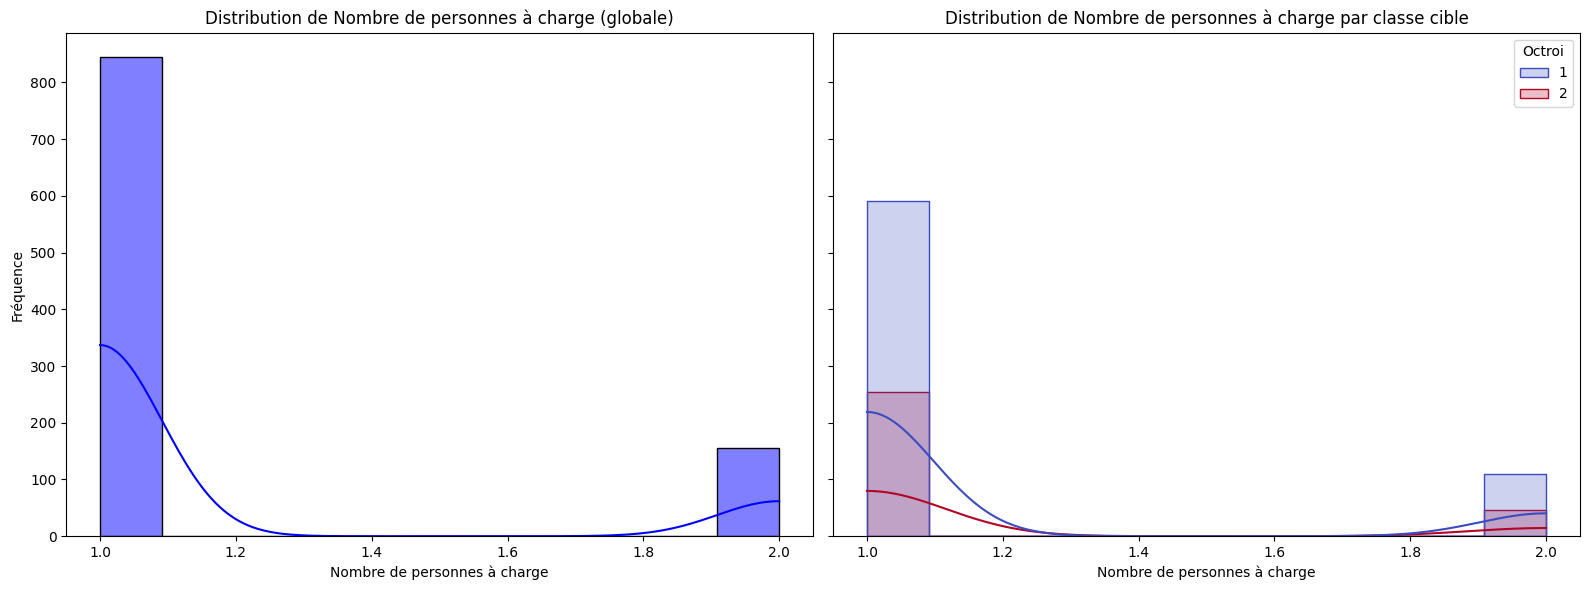

In [30]:
# Distribution des variables numériques avec et sans répartition par classe cible
for column in numeric_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # Distribution globale
    sns.histplot(dataset[column], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f'Distribution de {column} (globale)')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Fréquence')

    # Distribution par classe cible
    sns.histplot(data=dataset, x=column, hue='Octroi', kde=True, ax=axes[1], palette='coolwarm', element='step')
    axes[1].set_title(f'Distribution de {column} par classe cible')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Fréquence')

    plt.tight_layout()
    plt.show()
    plt.show()

<ipython-input-31-ba898112a3c2>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




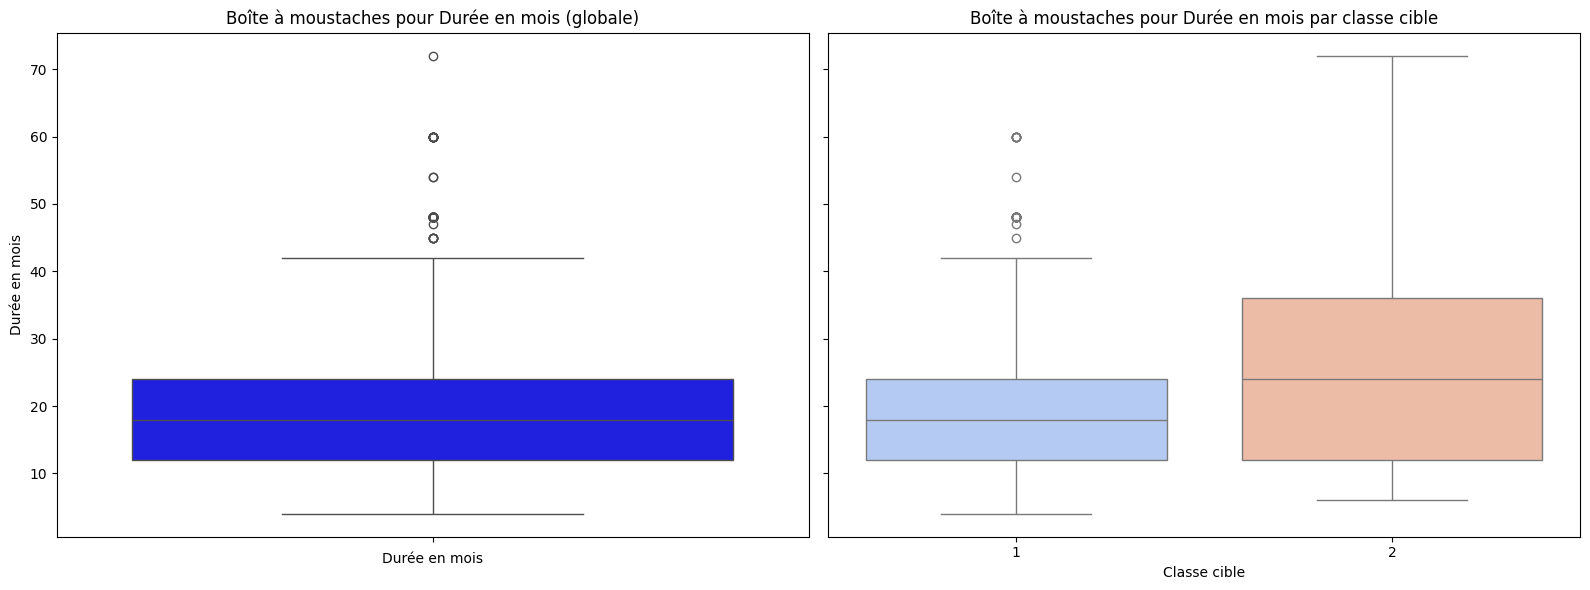

<ipython-input-31-ba898112a3c2>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




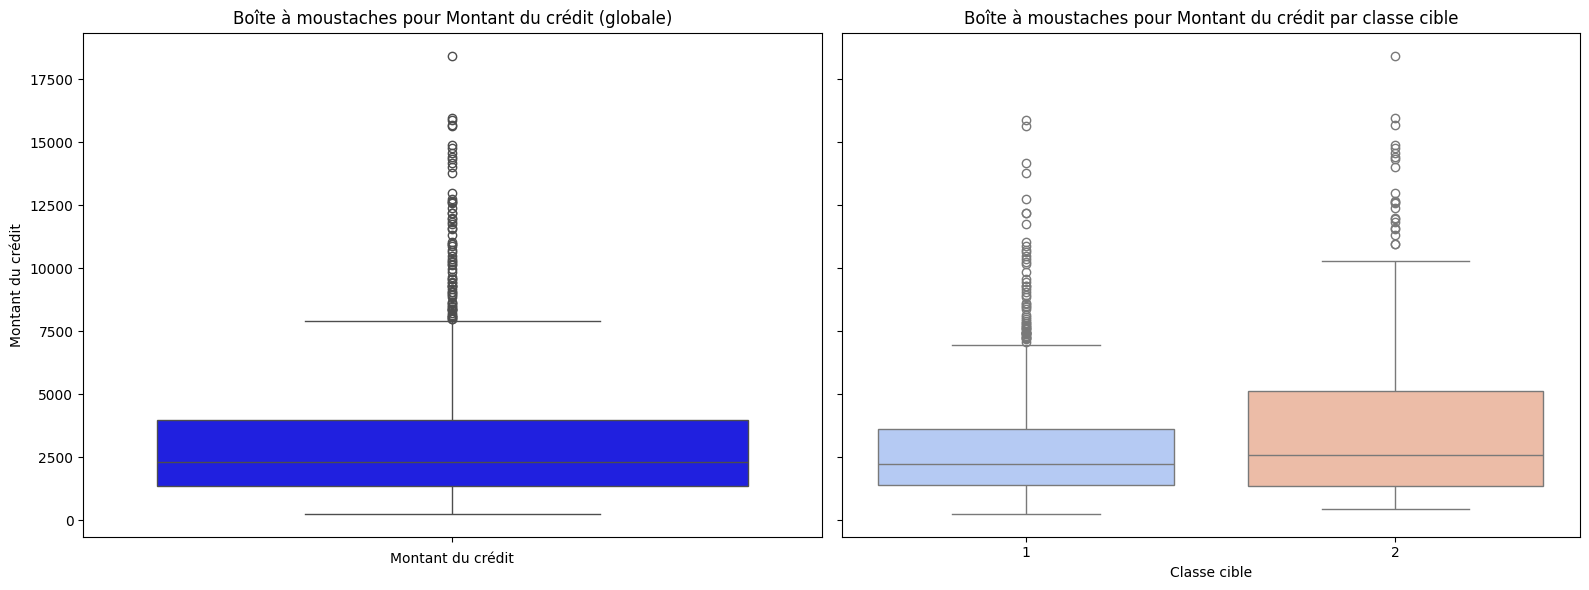

<ipython-input-31-ba898112a3c2>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




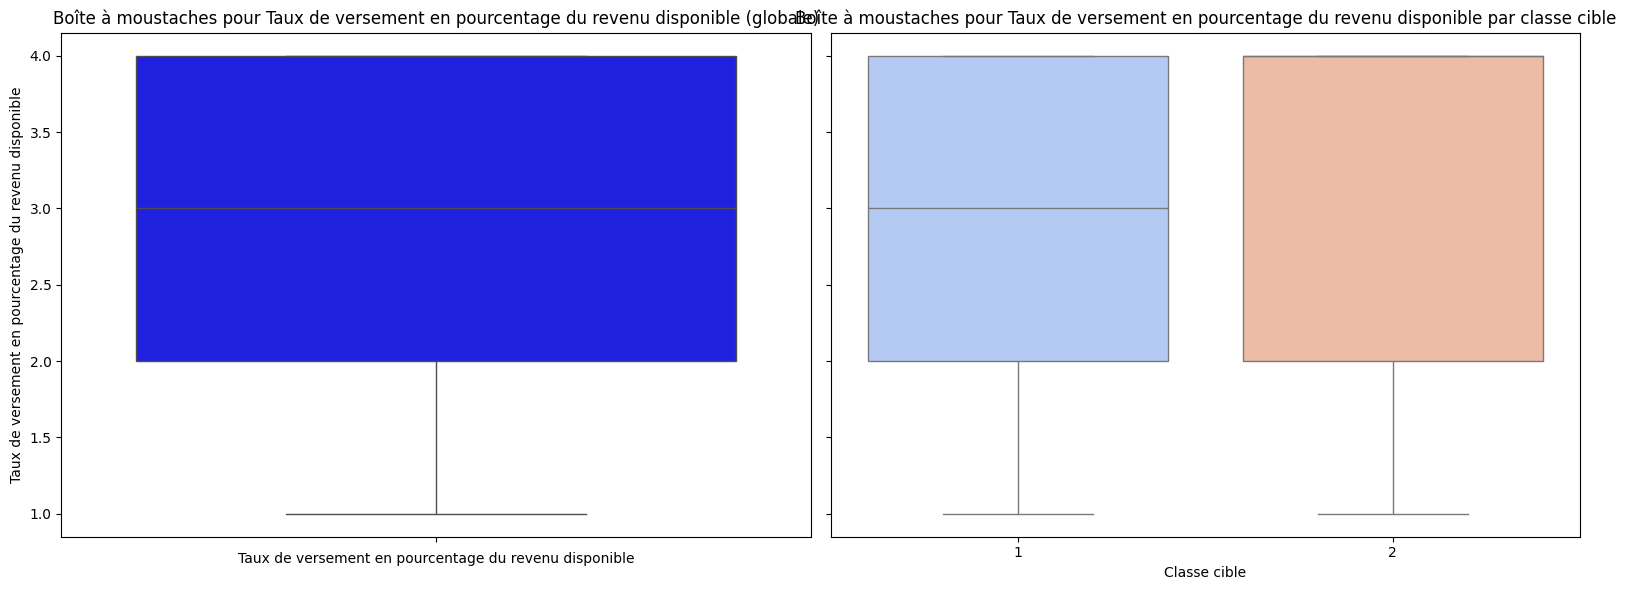

<ipython-input-31-ba898112a3c2>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




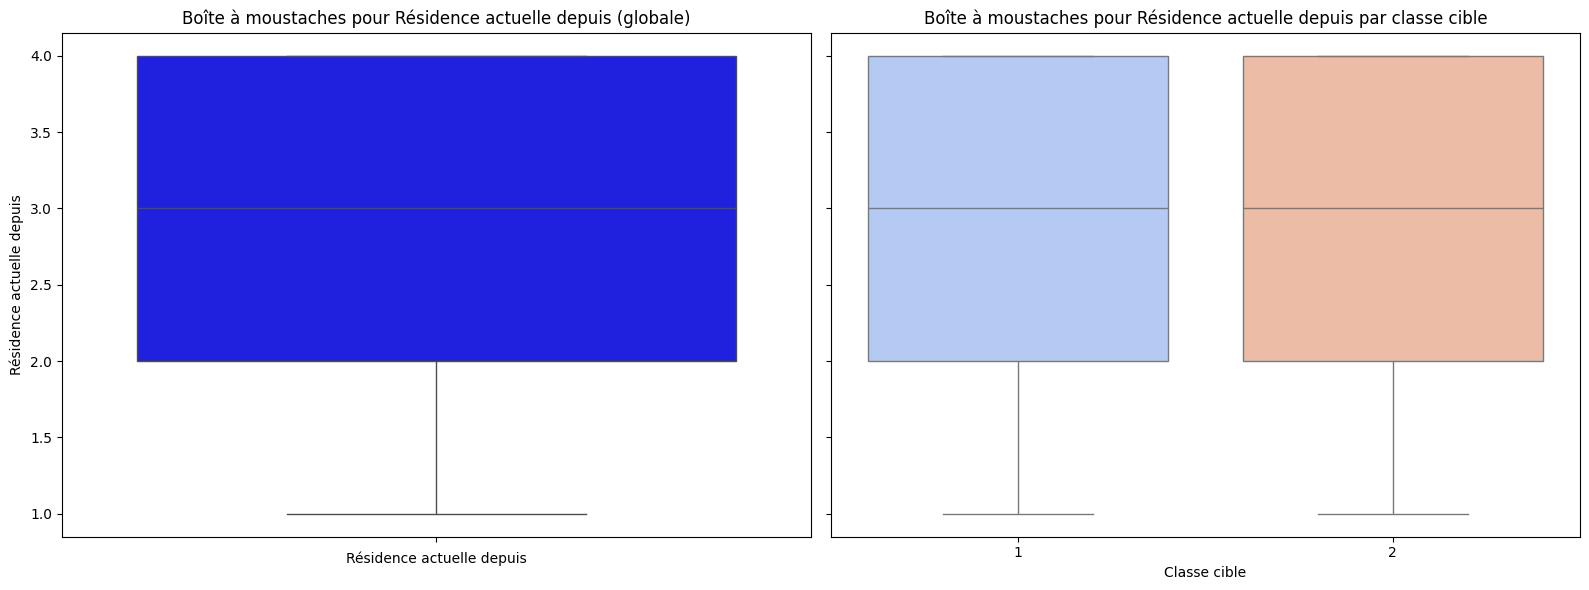

<ipython-input-31-ba898112a3c2>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




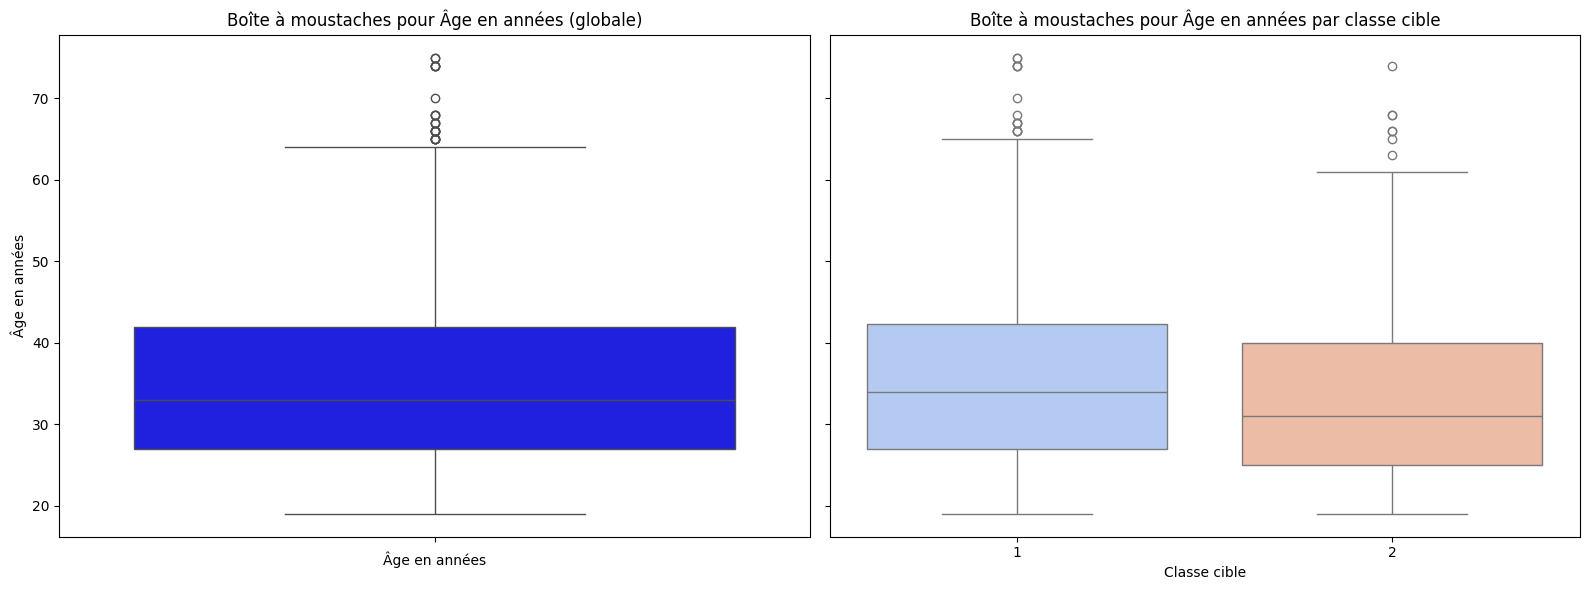

<ipython-input-31-ba898112a3c2>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




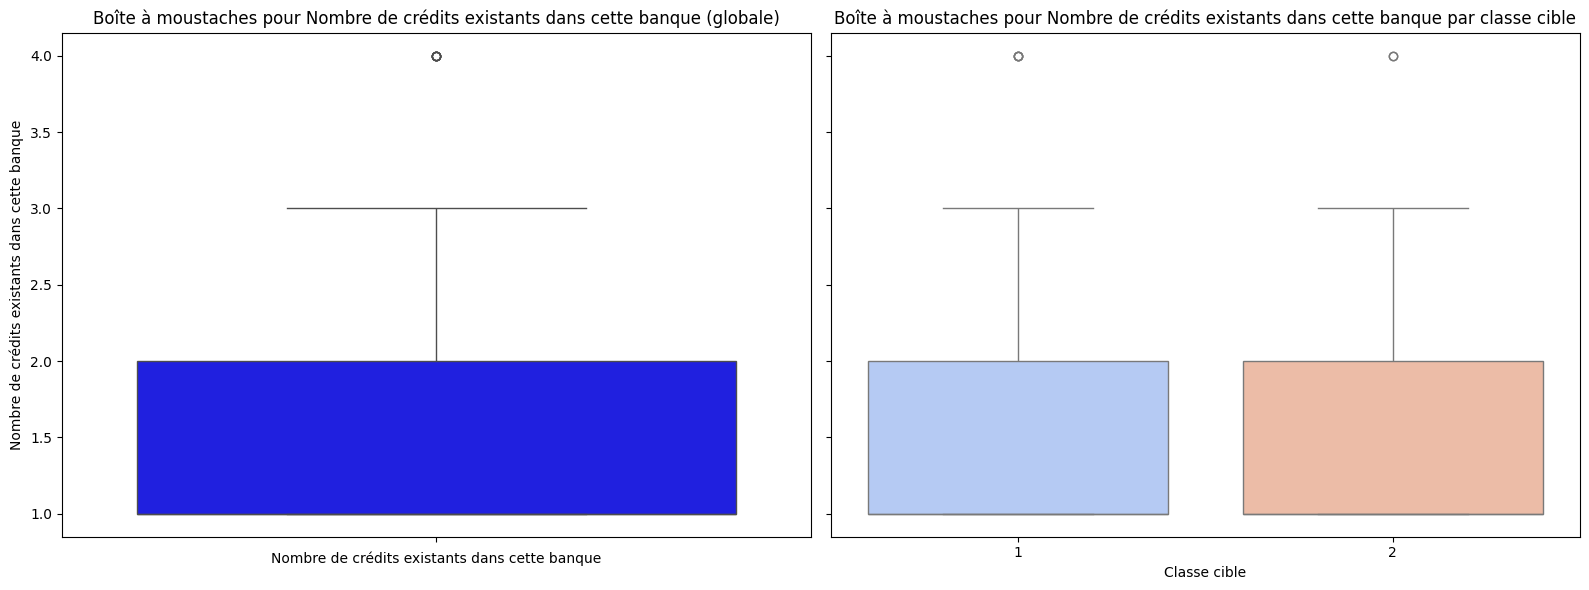

<ipython-input-31-ba898112a3c2>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




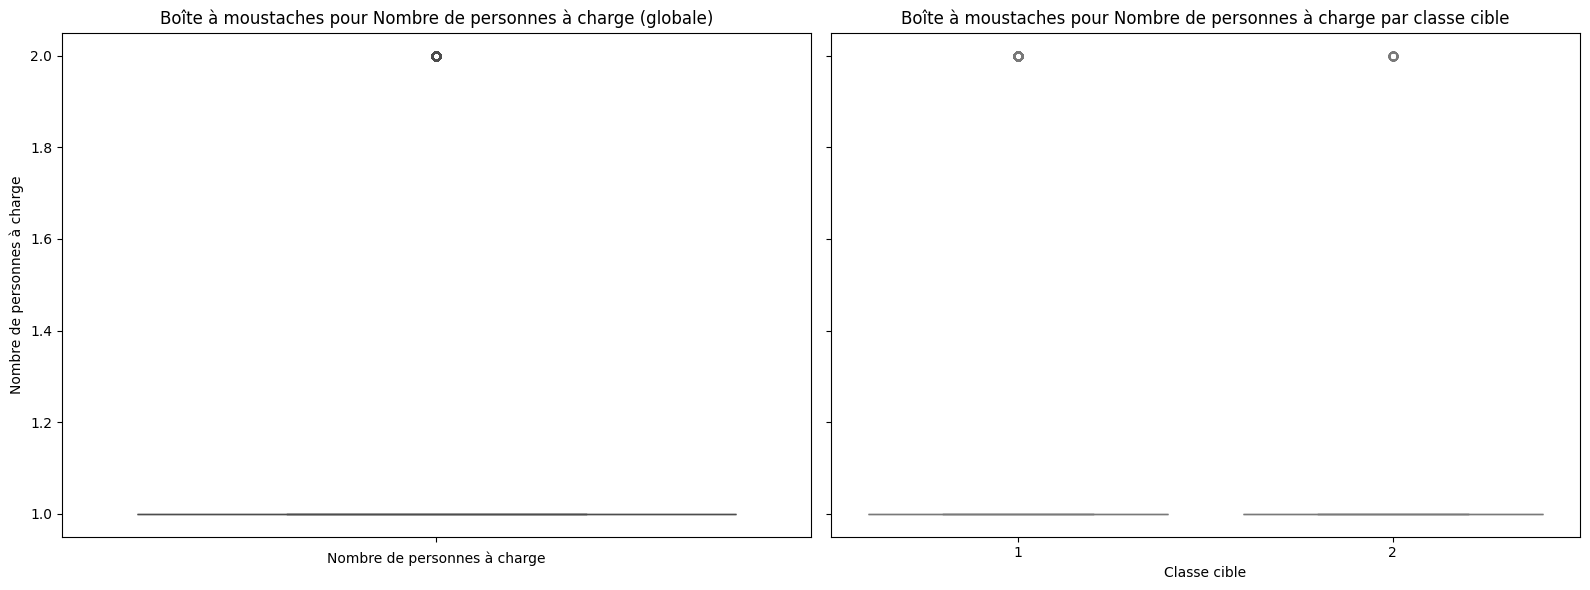

In [31]:
# Boxplots pour les variables numériques avec et sans répartition par classe cible
for column in numeric_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # Boxplot global
    sns.boxplot(y=dataset[column], ax=axes[0], color='blue')
    axes[0].set_title(f'Boîte à moustaches pour {column} (globale)')
    axes[0].set_xlabel(column)

    # Boxplot par classe cible
    sns.boxplot(x='Octroi', y=column, data=dataset, palette='coolwarm', ax=axes[1])
    axes[1].set_title(f'Boîte à moustaches pour {column} par classe cible')
    axes[1].set_xlabel('Classe cible')
    axes[1].set_ylabel(column)

    plt.tight_layout()
    plt.show()



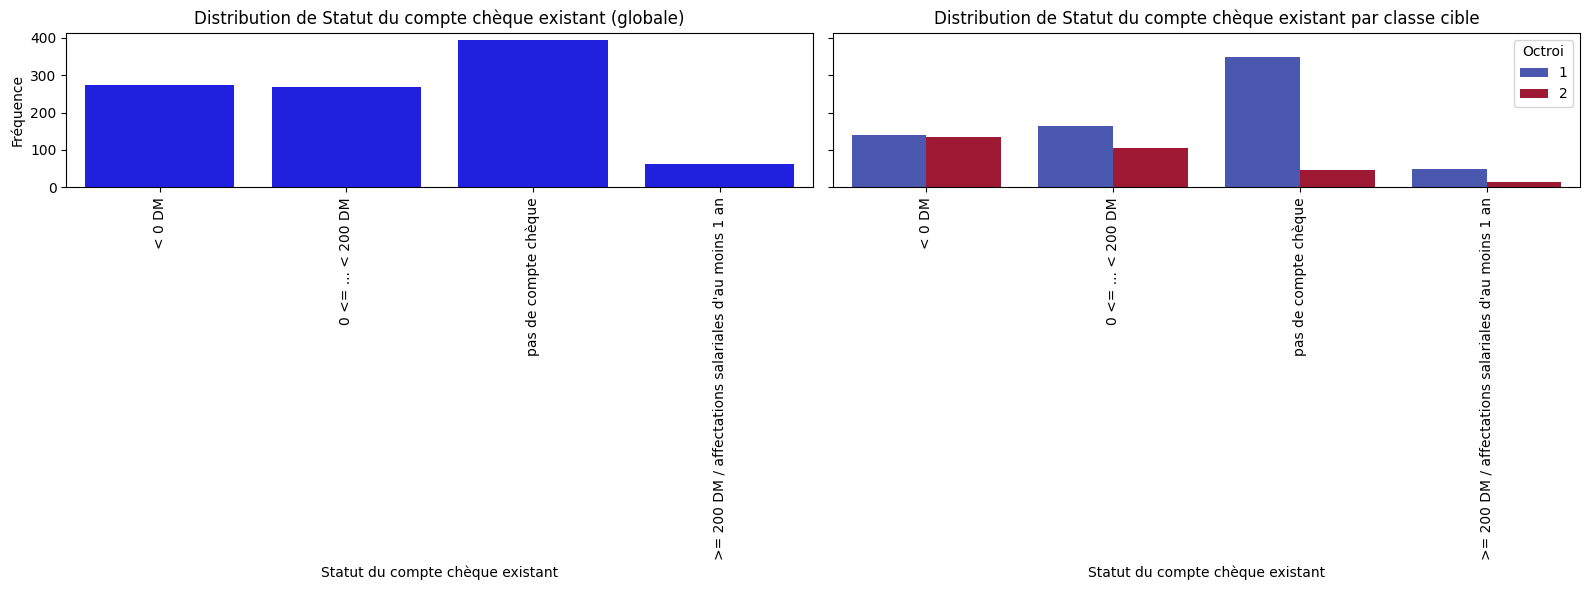

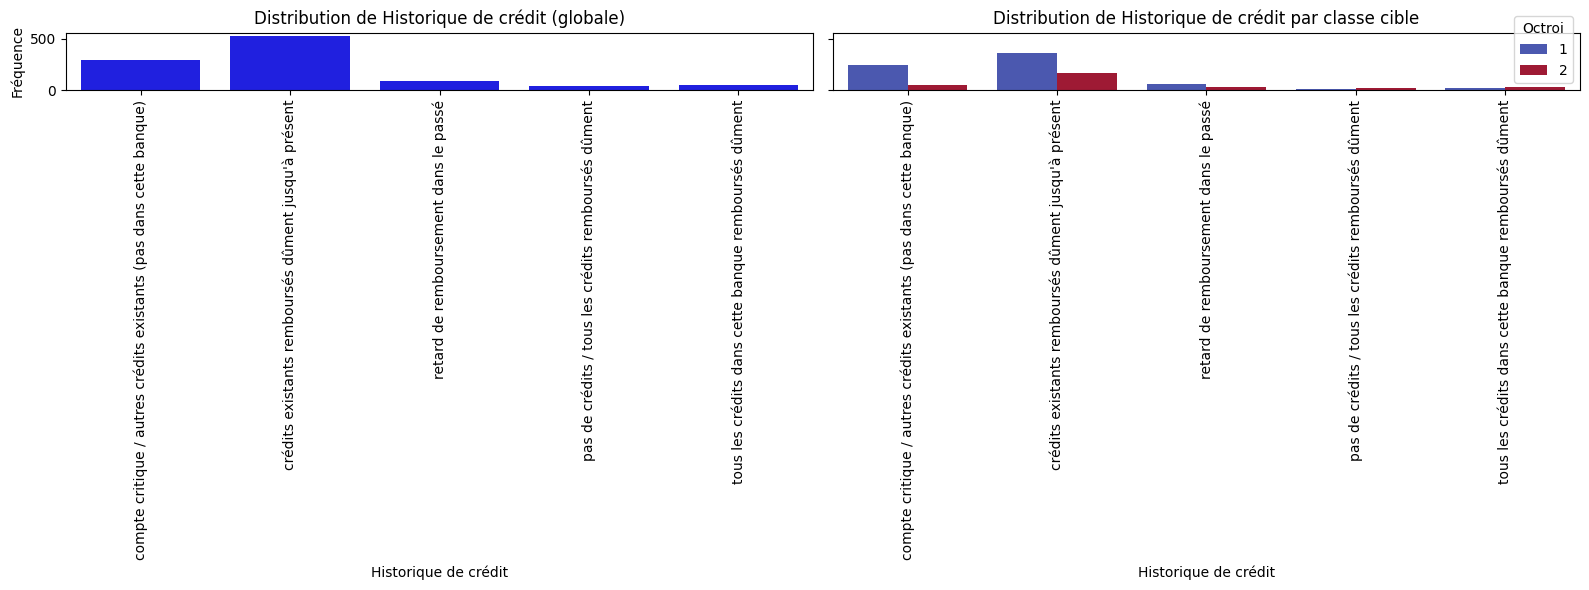

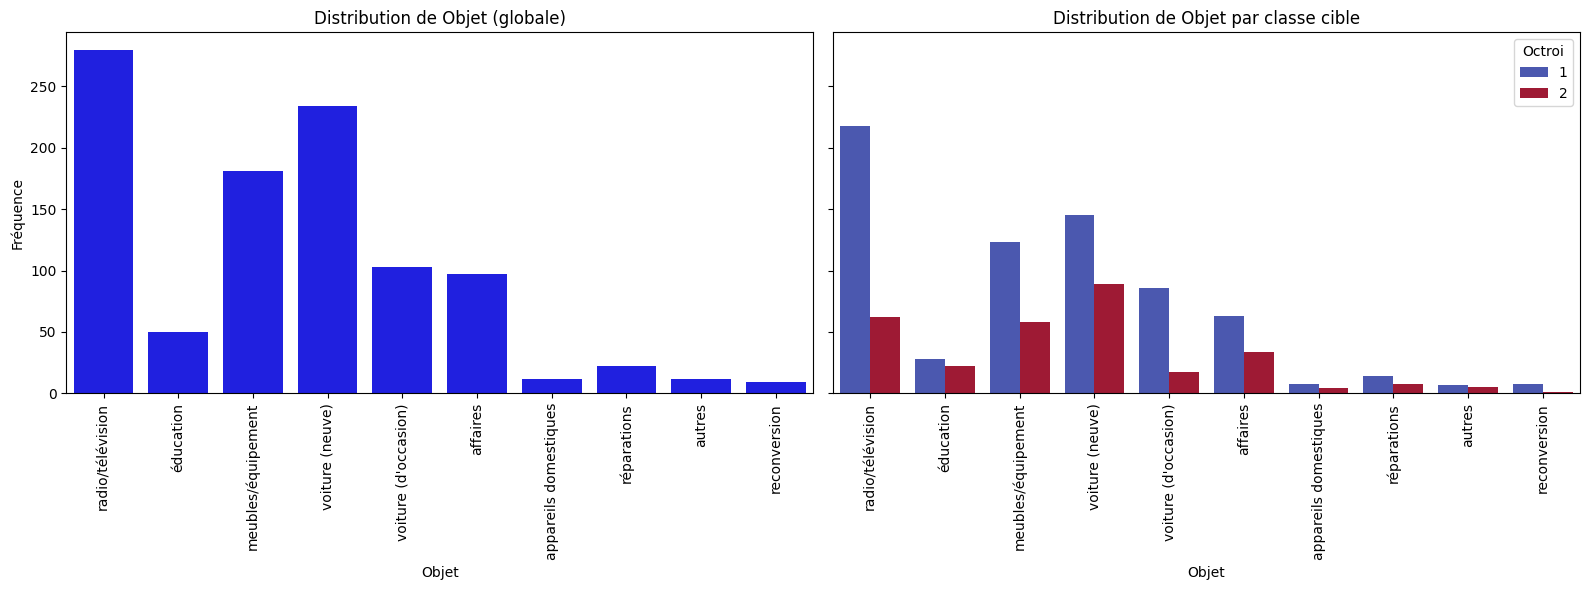

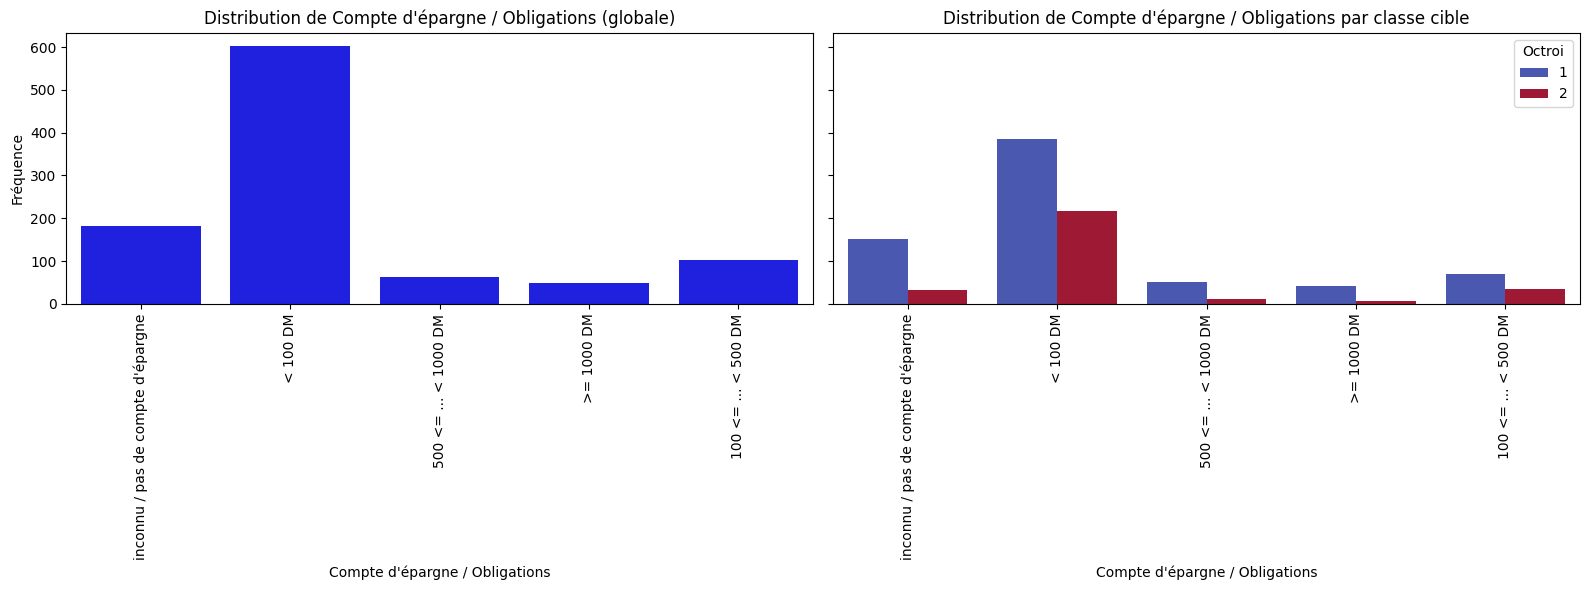

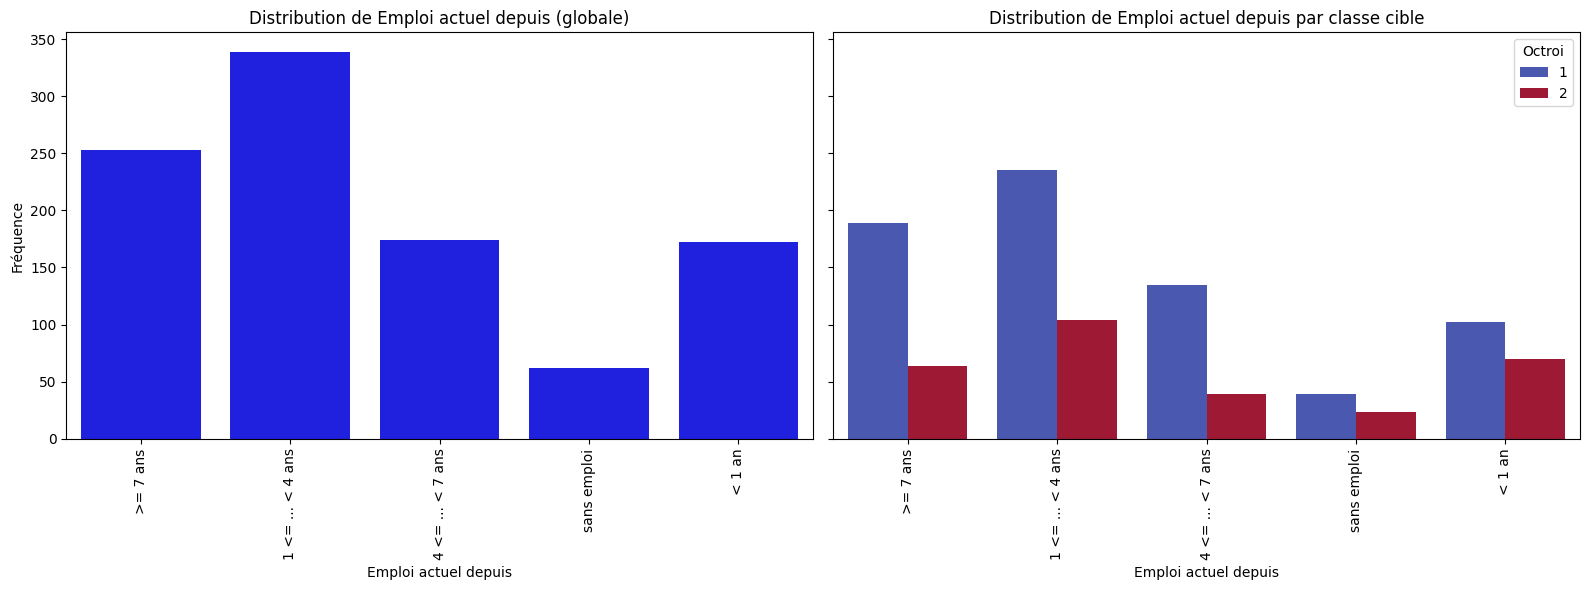

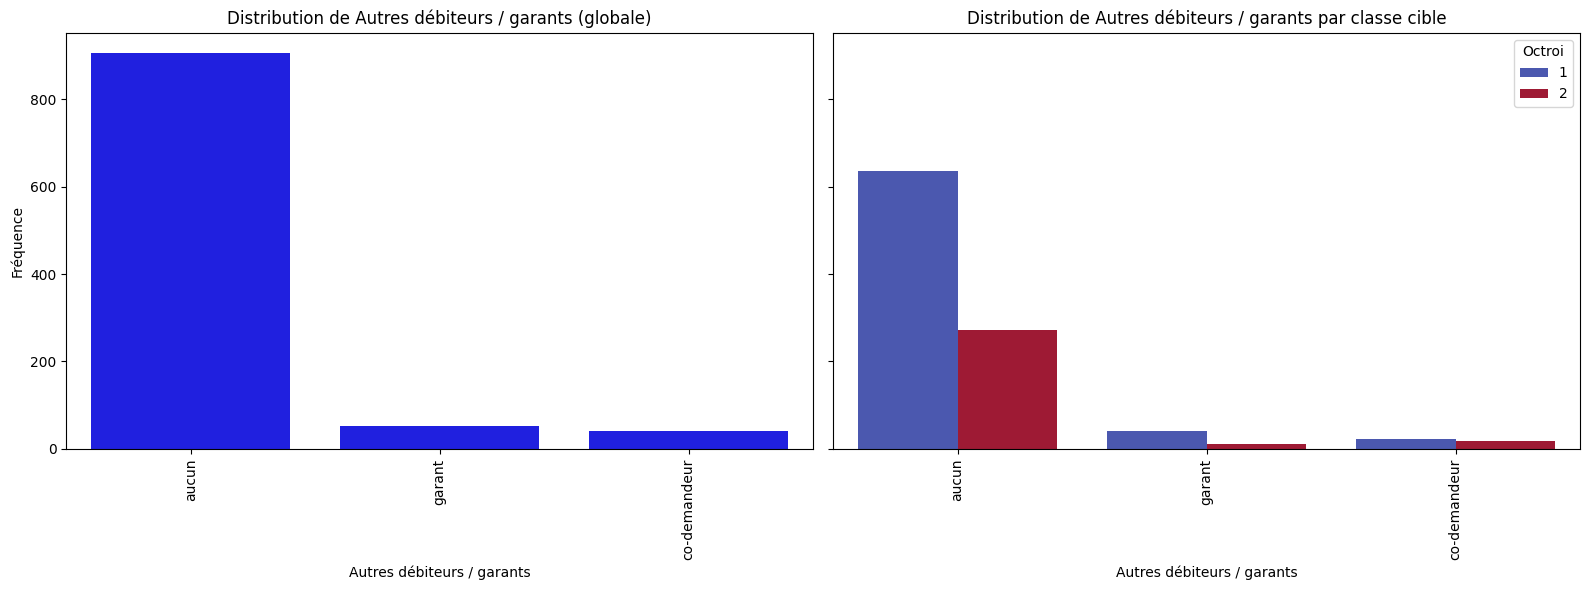

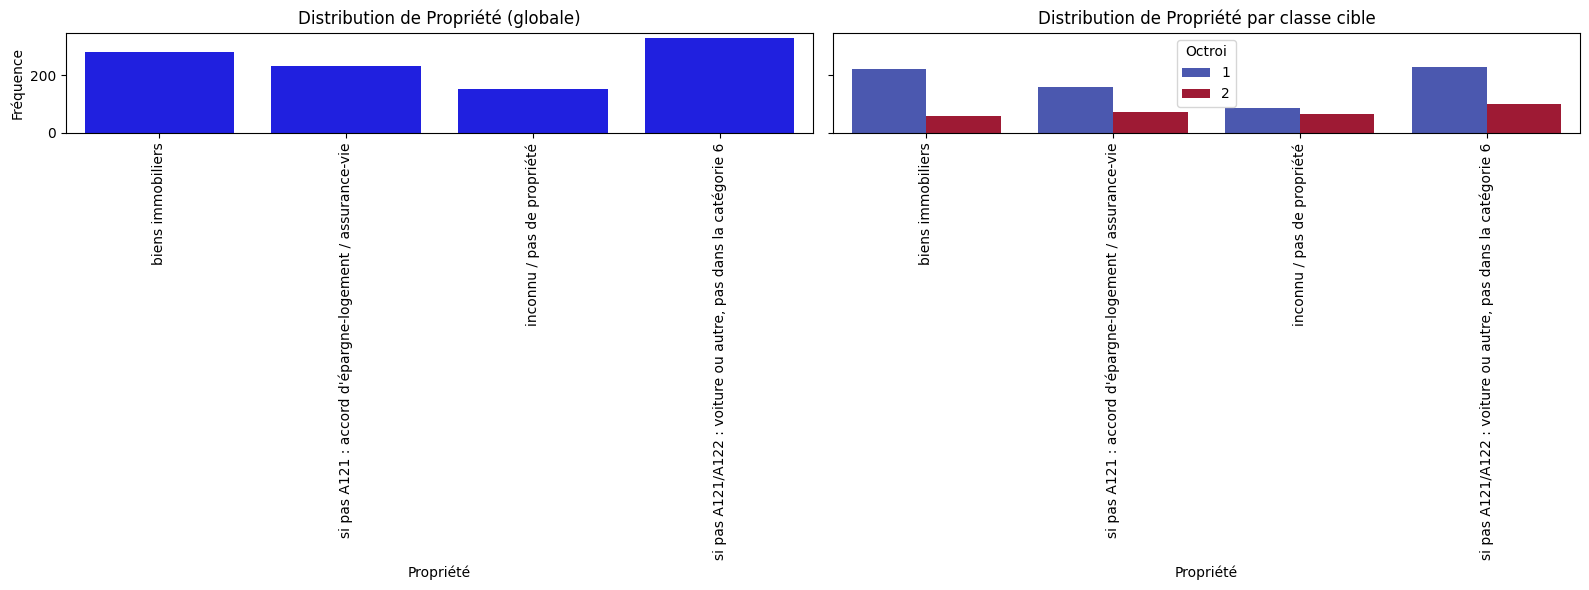

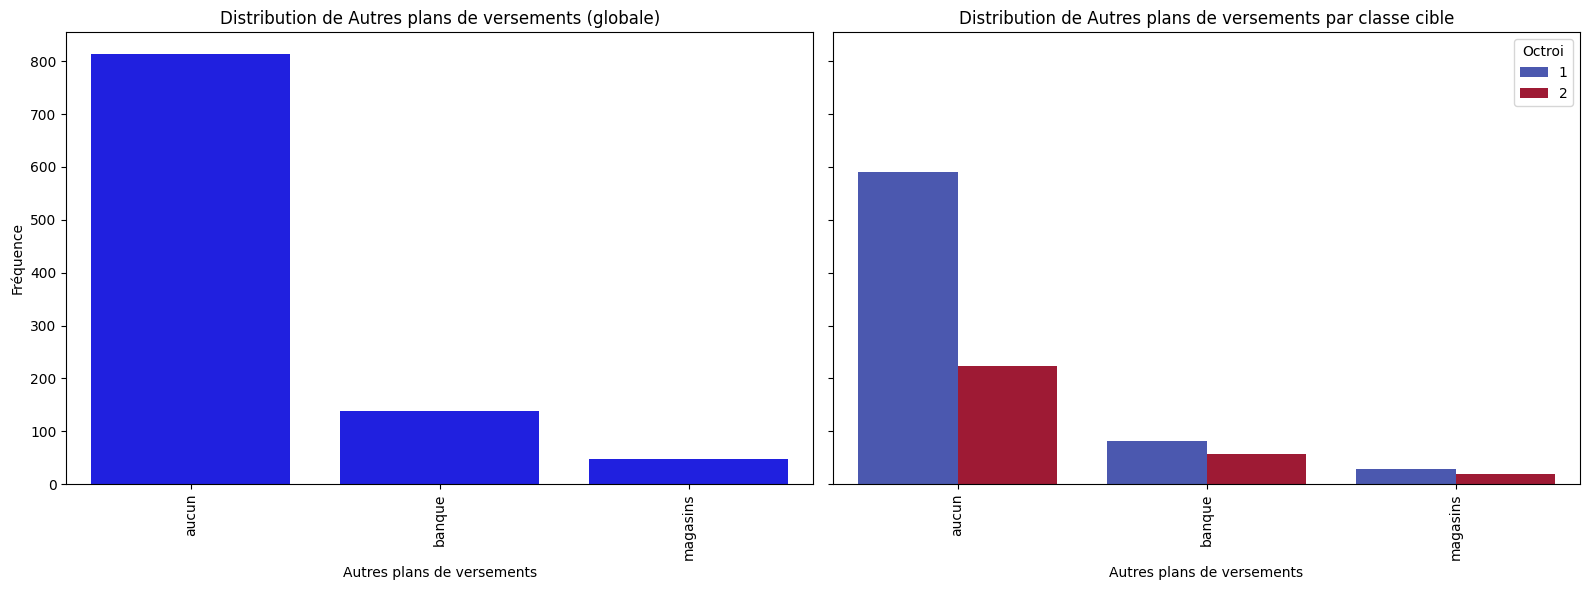

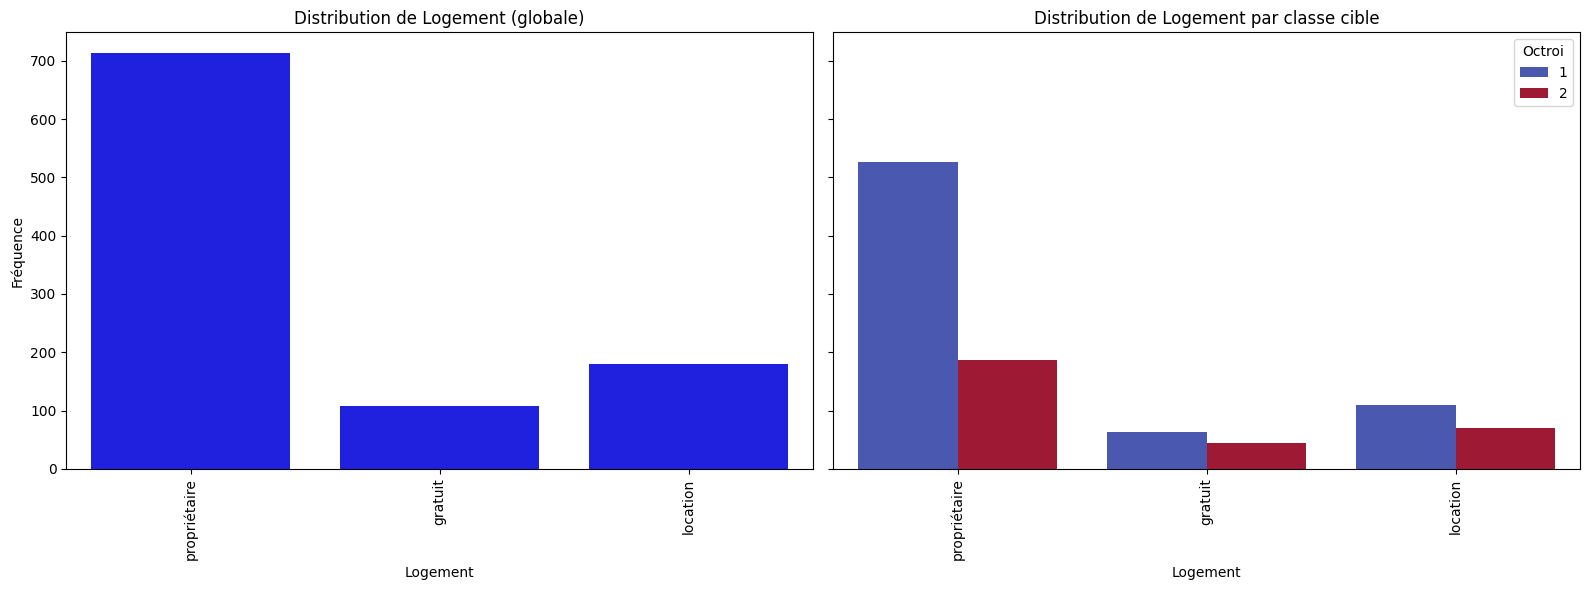

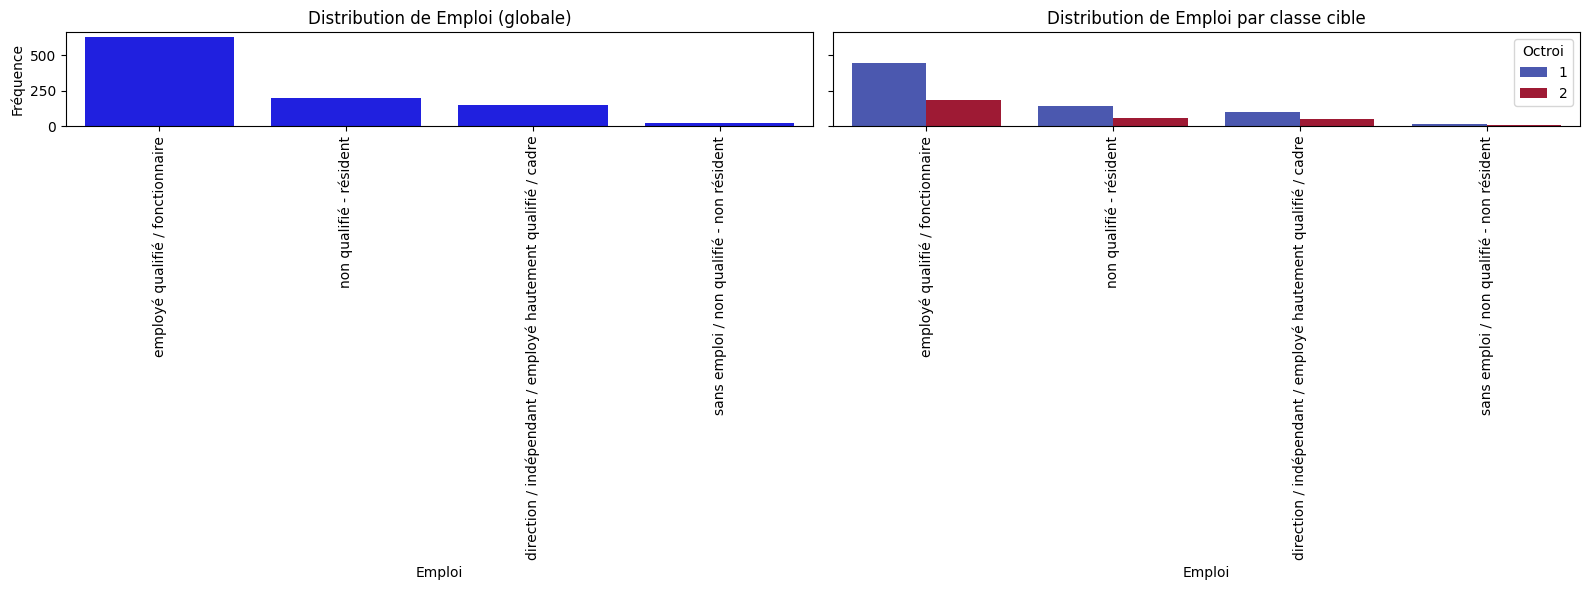

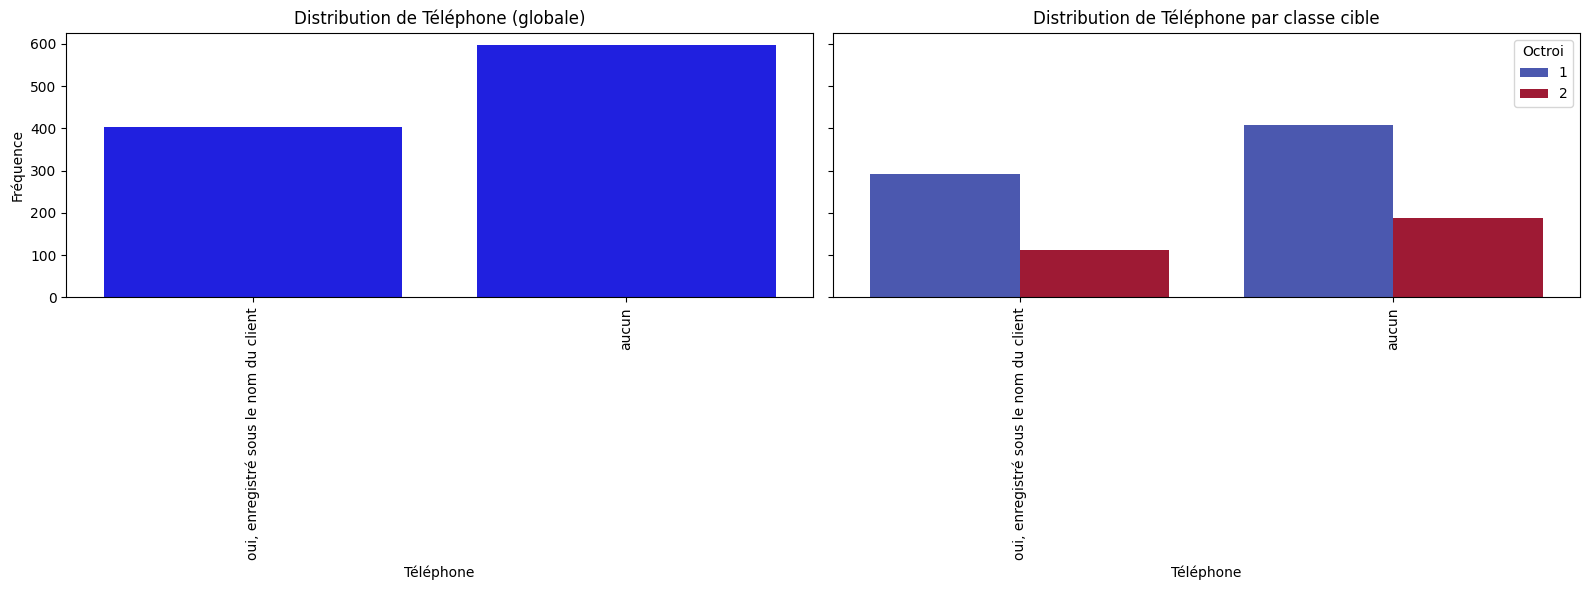

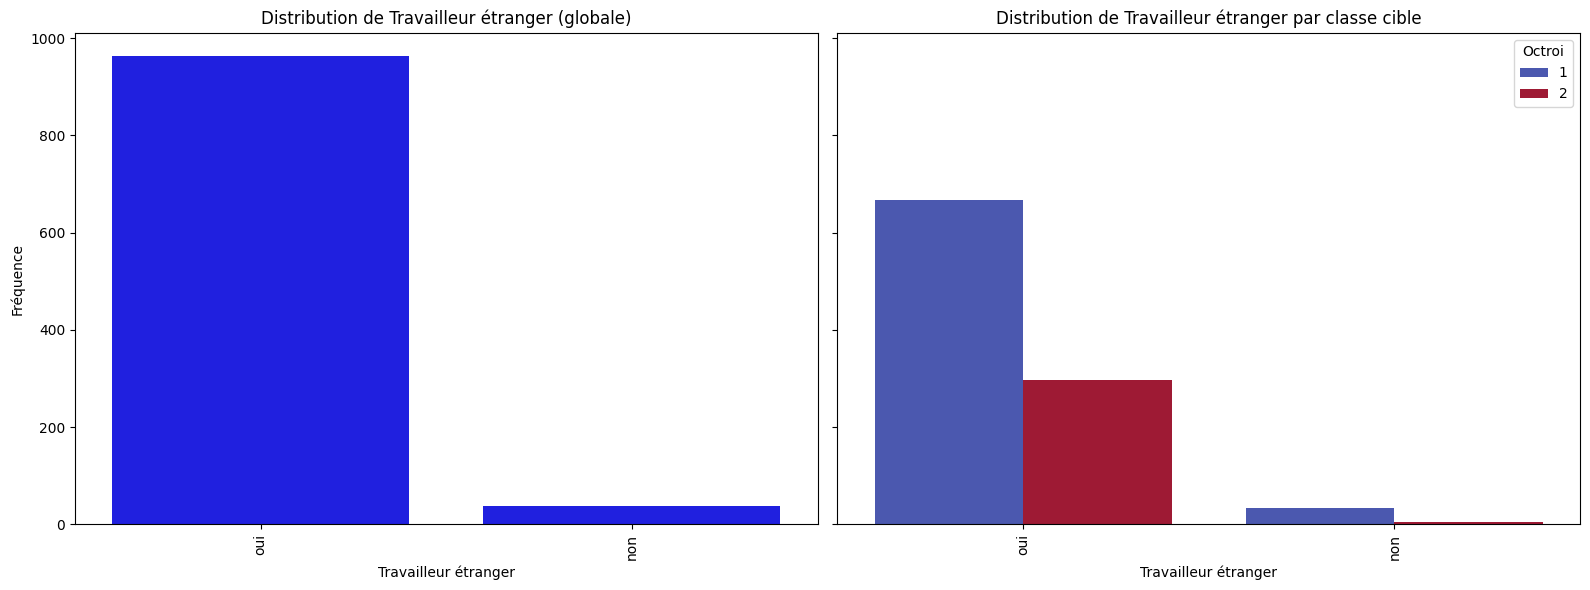

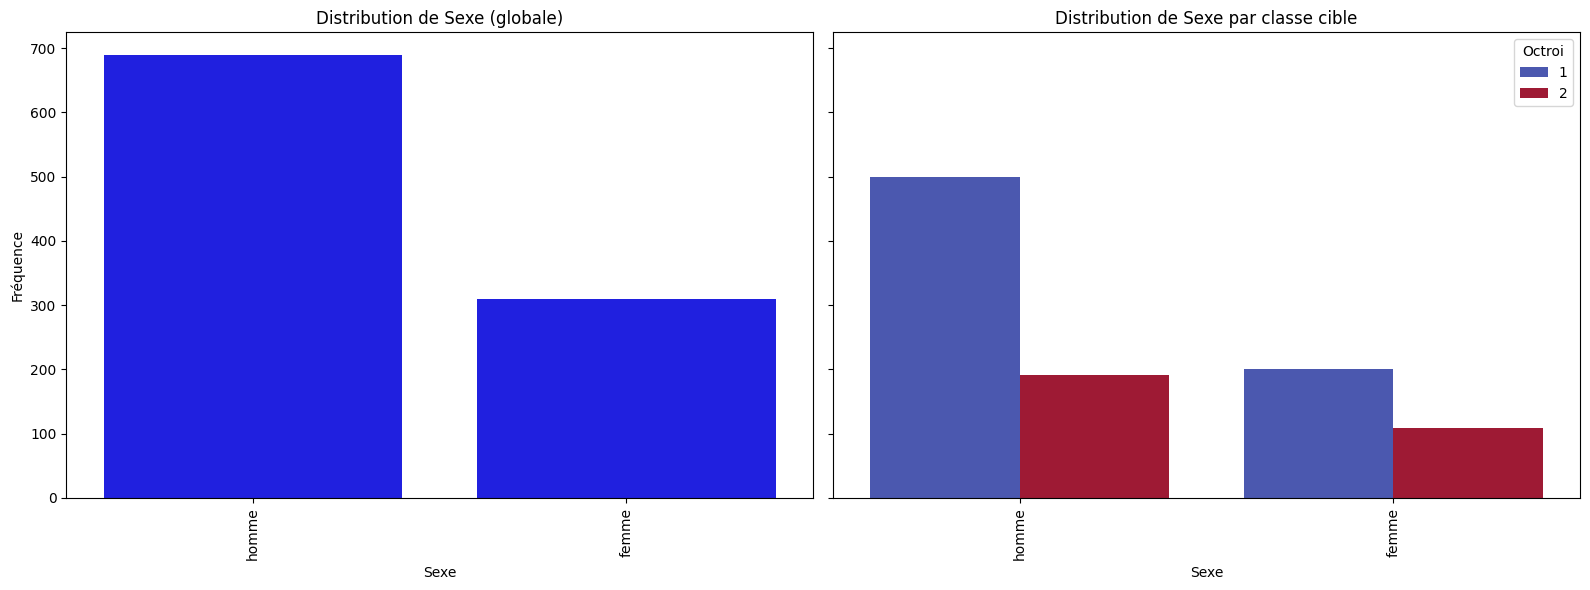

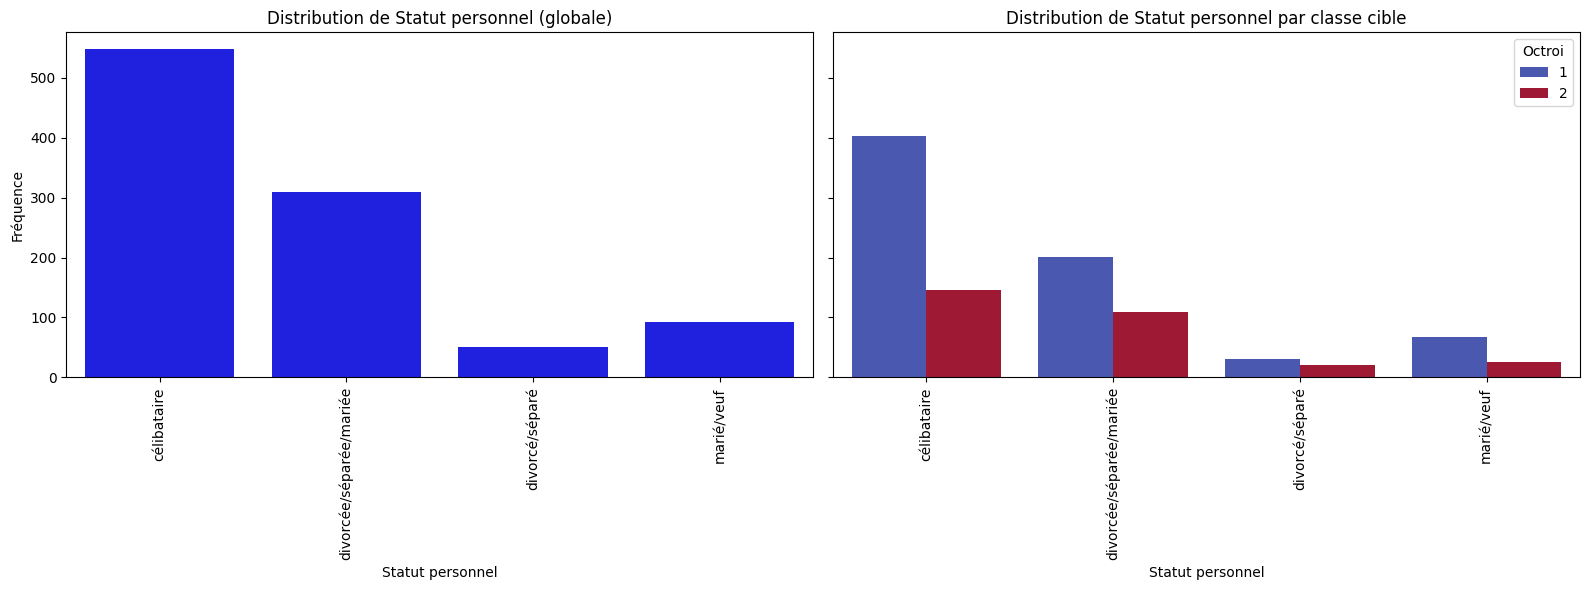

In [32]:
# Analyse des variables catégoriques avec et sans répartition par classe cible
for column in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # Distribution globale
    sns.countplot(x=column, data=dataset, ax=axes[0], color='blue')
    axes[0].set_title(f'Distribution de {column} (globale)')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Fréquence')
    axes[0].tick_params(axis='x', rotation=90)

    # Distribution par classe cible
    sns.countplot(x=column, hue='Octroi', data=dataset, ax=axes[1], palette='coolwarm')
    axes[1].set_title(f'Distribution de {column} par classe cible')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Fréquence')
    axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()


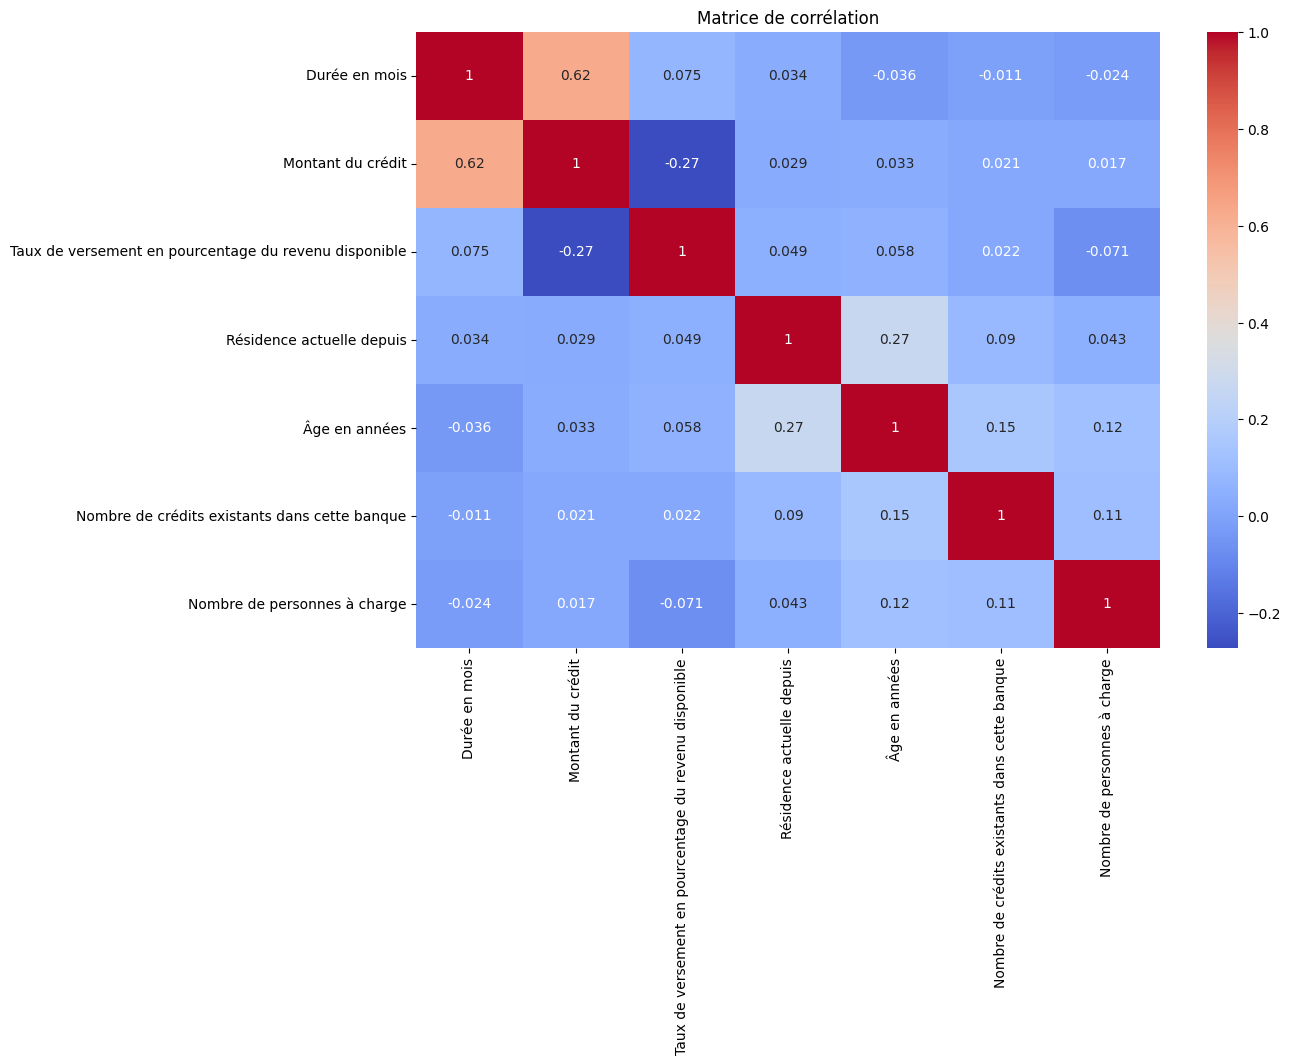

In [34]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(dataset[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [47]:
# Corrélation entre les variables numériques et la cible
correlations = dataset[list(numeric_features) + ['Octroi']].corr()
target_corr = correlations['Octroi'].drop('Octroi')
print("Corrélation avec la cible :")
print(target_corr.sort_values(ascending=False))


Corrélation avec la cible :
Durée en mois                                            0.214927
Montant du crédit                                        0.154739
Taux de versement en pourcentage du revenu disponible    0.072404
Résidence actuelle depuis                                0.002967
Nombre de personnes à charge                            -0.003015
Nombre de crédits existants dans cette banque           -0.045732
Âge en années                                           -0.091127
Name: Octroi, dtype: float64


In [53]:
from sklearn.feature_selection import mutual_info_classif

# Calcul de la mutual information
mi = mutual_info_classif(data[numeric_features], y, random_state=42)
mi_df = pd.DataFrame({'Feature': numeric_features, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print("Mutual Information avec la cible :")
print(mi_df)


Mutual Information avec la cible :
                                             Feature  Mutual Information
0                                      Durée en mois            0.039110
4                                      Âge en années            0.018392
1                                  Montant du crédit            0.011449
6                       Nombre de personnes à charge            0.008467
2  Taux de versement en pourcentage du revenu dis...            0.000000
3                          Résidence actuelle depuis            0.000000
5      Nombre de crédits existants dans cette banque            0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [35]:
from scipy.stats import chi2_contingency, ttest_ind, normaltest

In [36]:
# Tests statistiques
print("\nTests statistiques :")
# Test de normalité pour les variables numériques
for column in numeric_features:
    stat, p = normaltest(dataset[column])
    print(f"Test de normalité pour {column} : stat={stat}, p={p}")
    if p < 0.05:
        print(f"--> {column} ne suit pas une distribution normale.")
    else:
        print(f"--> {column} suit une distribution normale.")


Tests statistiques :
Test de normalité pour Durée en mois : stat=156.05412146437033, p=1.2980101391465855e-34
--> Durée en mois ne suit pas une distribution normale.
Test de normalité pour Montant du crédit : stat=396.0421710872409, p=1.0012332136508667e-86
--> Montant du crédit ne suit pas une distribution normale.
Test de normalité pour Taux de versement en pourcentage du revenu disponible : stat=842.4252828624805, p=1.1740162779330229e-183
--> Taux de versement en pourcentage du revenu disponible ne suit pas une distribution normale.
Test de normalité pour Résidence actuelle depuis : stat=22019.260017305423, p=0.0
--> Résidence actuelle depuis ne suit pas une distribution normale.
Test de normalité pour Âge en années : stat=133.88865716195502, p=8.442041884948033e-30
--> Âge en années ne suit pas une distribution normale.
Test de normalité pour Nombre de crédits existants dans cette banque : stat=208.70053027978696, p=4.800159458258712e-46
--> Nombre de crédits existants dans cette

In [37]:
# Test du chi2 pour les variables catégoriques
variables_prestinante = []
for column in categorical_features:
    contingency_table = pd.crosstab(dataset[column], dataset['Octroi'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nTest du chi2 pour {column} : chi2={chi2}, p={p}")
    if p < 0.05:
        print(f"--> Association significative entre {column} et la variable cible.")
        variables_prestinante.append(column)
    else:
        print(f"--> Pas d'association significative entre {column} et la variable cible.")


Test du chi2 pour Statut du compte chèque existant : chi2=123.72094351626559, p=1.2189020722893845e-26
--> Association significative entre Statut du compte chèque existant et la variable cible.

Test du chi2 pour Historique de crédit : chi2=61.69139696459551, p=1.2791872956750918e-12
--> Association significative entre Historique de crédit et la variable cible.

Test du chi2 pour Objet : chi2=33.35644686141815, p=0.00011574910079691586
--> Association significative entre Objet et la variable cible.

Test du chi2 pour Compte d'épargne / Obligations : chi2=36.098928192418704, p=2.761214238568249e-07
--> Association significative entre Compte d'épargne / Obligations et la variable cible.

Test du chi2 pour Emploi actuel depuis : chi2=18.3682738466968, p=0.0010454523491402541
--> Association significative entre Emploi actuel depuis et la variable cible.

Test du chi2 pour Autres débiteurs / garants : chi2=6.645366537264243, p=0.036055954027247226
--> Association significative entre Autres

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
# Encodage des variables catégoriques
encoder = LabelEncoder()
for col in categorical_features:
    dataset[col] = encoder.fit_transform(dataset[col])

# Séparation des caractéristiques (X) et de la variable cible (y)
X = dataset.drop('Octroi', axis=1)
y = dataset['Octroi']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Modélisation avec Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print("Évaluation du modèle :")
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))
print("\nPrécision globale :", accuracy_score(y_test, y_pred))

Évaluation du modèle :
Matrice de confusion :
[[129  12]
 [ 36  23]]

Rapport de classification :
              precision    recall  f1-score   support

           1       0.78      0.91      0.84       141
           2       0.66      0.39      0.49        59

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.67       200
weighted avg       0.75      0.76      0.74       200


Précision globale : 0.76


<ipython-input-59-baf09cfde788>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




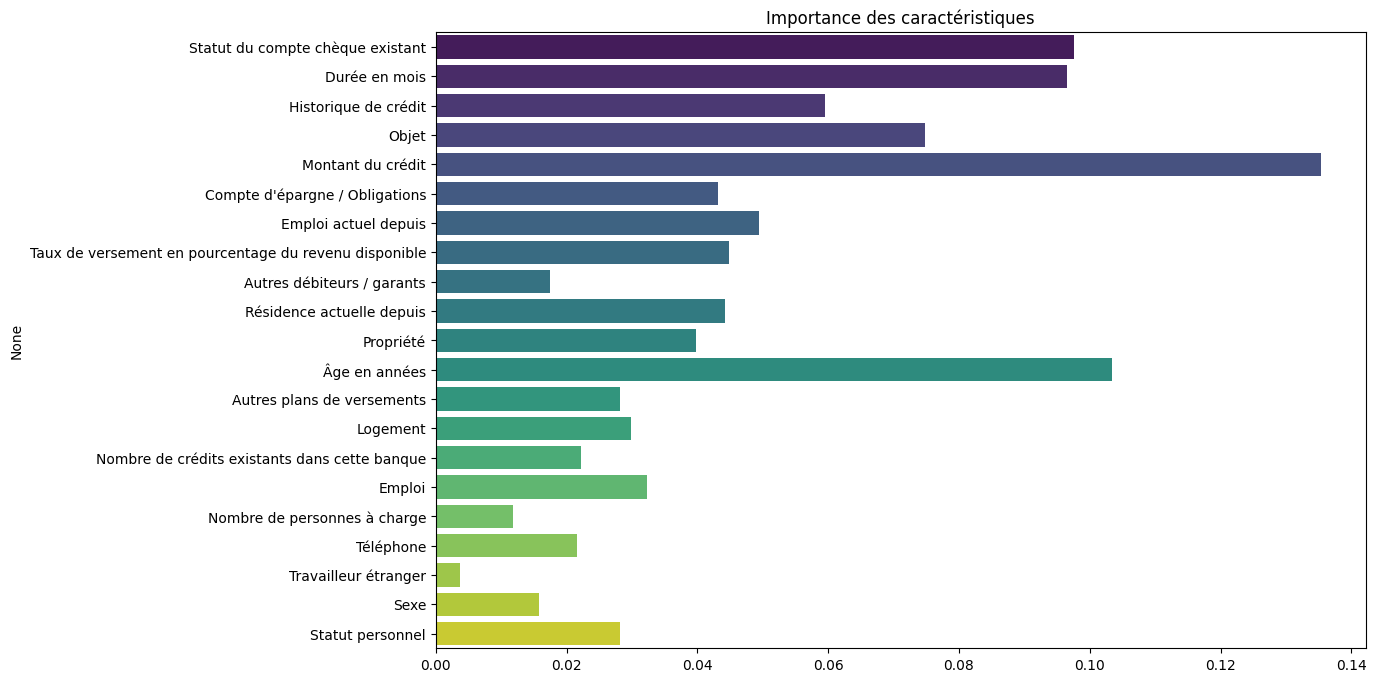

In [59]:
# Importance des caractéristiques
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Importance des caractéristiques')
plt.show()